<a href="https://colab.research.google.com/github/ikwak2/APCP/blob/master/9_min/meta_min_revision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Meta-analysis for proportions

Check this [video](https://www.youtube.com/watch?v=2wbXTFvaRnM) and a [paper](https://www.nature.com/articles/srep28564) 

[자료들](https://github.com/wviechtb/meta_analysis_books)

분석방향: 
메타 분석은 taste strip test 그룹, PTU 그룹에 대해서 따로 따로 진행하고, 추가변수 없이 분석해보는 버전과, 나이 변수를 고려했을 때 버전으로 진행


In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
system("gdown --id 1wppb3DIReYSMuunwIU9iVvYv23h0fEJb")
data = read.csv("pakins3.csv")

data$authoryear = paste(data[,2], data$year, sep=" ")

In [9]:
system("gdown --id 1XwbqVOxLDTww3negMYb4Guqn-RJusS9E")
data2 = read.csv("data_rob.csv")


In [3]:
tests1 = c("taste strip test",
"taste spray score",
"taste strip test",
"questionnaire",
"taste strip test",
"taste solution test",
"taste strip test",
"questionnaire",
"PTU",
"taste strip test",
"taste strip test",
"taste solution test",
"PTU",
"questionnaire",
"taste solution test",
"taste strip test",
"questionnaire",
"electrogustometry (dB)",
"questionnaire")


In [4]:
tb1 = table(tests1)
(tb1 = tb1 %>% tbl_df)

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.”


tests1,n
<chr>,<int>
electrogustometry (dB),1
PTU,2
questionnaire,5
taste solution test,3
taste spray score,1
taste strip test,7


In [6]:
install.packages("devtools")
devtools::install_github("mcguinlu/robvis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”



mathjaxr (NA    -> 1.6-0) [CRAN]
pbapply  (NA    -> 1.7-0) [CRAN]
metadat  (NA    -> 1.2-0) [CRAN]
stringr  (1.4.1 -> 1.5.0) [CRAN]
isoband  (0.2.6 -> 0.2.7) [CRAN]
metafor  (NA    -> 3.8-1) [CRAN]


Installing 6 packages: mathjaxr, pbapply, metadat, stringr, isoband, metafor

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp2xAtWJ/remotes716bc2d02f/mcguinlu-robvis-6005a27/DESCRIPTION’ ... OK
* preparing ‘robvis’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘robvis/man/figures’
Removed empty directory ‘robvis/tests/testthat/_snaps/forest’
Removed empty directory ‘robvis/tests/testthat/_snaps/rob_paired_direction’
Removed empty directory ‘robvis/tests/testthat/_snaps/rob_summary’
Removed empty directory ‘robvis/tests/testthat/_snaps/rob_traffic_light’
Removed empty directory ‘robvis/tests/testthat/_snaps’
* building ‘robvis_0.3.0.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("robvis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(robvis)

In [10]:
mydata <- read.csv("data_rob.csv", header = TRUE)

In [27]:
mydata <- read_csv("data_rob.csv")

Rows: 11 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Study, D1, D2, D3, D4, D5, Overall

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
data_rob2

Study,D1,D2,D3,D4,D5,Overall,Weight
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Study 1,Low,Low,Low,Low,Low,Low,33.3333333
Study 2,Some concerns,Low,Low,Low,Low,Low,33.3333333
Study 3,Some concerns,Low,Some concerns,Low,Low,Some concerns,0.1428571
Study 4,Low,Low,High,Low,Some concerns,High,9.0909091
Study 5,High,High,Low,Low,Some concerns,Low,12.5000000
Study 6,Low,High,Some concerns,Low,Low,Some concerns,25.0000000
Study 7,Low,Some concerns,Some concerns,High,Low,Some concerns,200.0000000
Study 8,Low,Some concerns,Low,Low,Low,Low,11.1111111
Study 9,Low,Low,High,Low,Low,High,1.1111111


In [28]:
mydata$Weight = c(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0) 

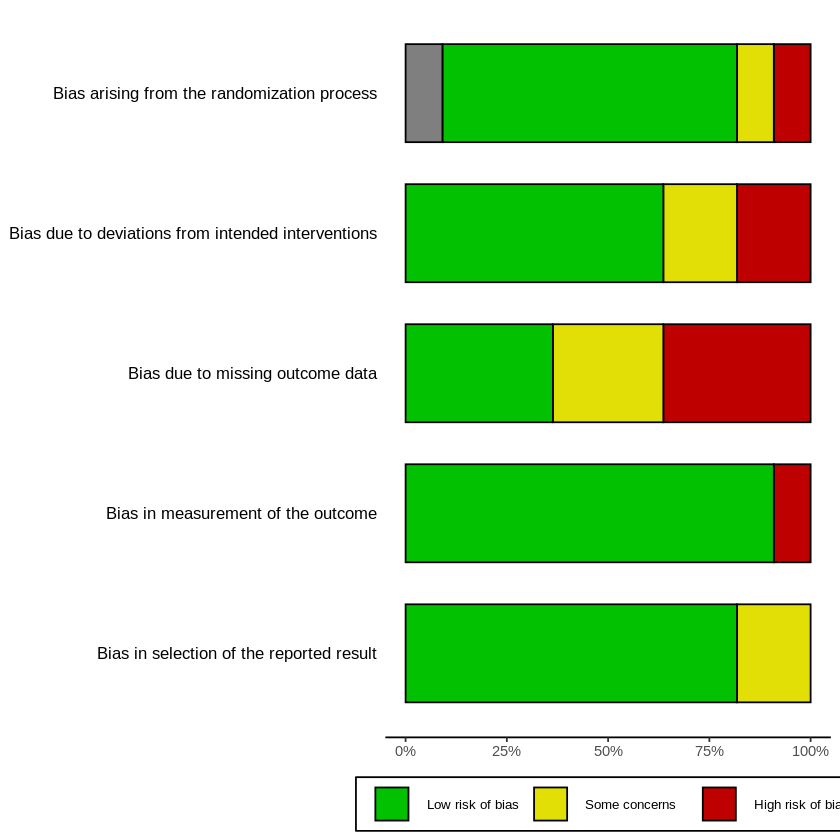

In [29]:
summary_rob <- rob_summary(data = mydata, tool = "ROB2")

summary_rob

In [30]:
mydata

Study,D1,D2,D3,D4,D5,Overall,Weight
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Carla Masala 2020,Low,Low,Low,Low,Low,Low,1
Maria Paola Cecchini 2019,Some concerns,Low,Low,Low,Low,Some concerns,1
Antje Haehner 2019,No information,Low,Some concerns,Low,Low,Some concerns,1
Paul J. Moberg 2007,Low,Low,High,Low,Some concerns,High,1
Dareia S. Roos 2018,High,High,Low,Low,Some concerns,High,1
Giovanni Cossu 2018,Low,High,Some concerns,Low,Low,High,1
Maria Paola Cecchini 2014,Low,Some concerns,Some concerns,High,Low,High,1
Xiaoling Qin 2019,Low,Some concerns,Low,Low,Low,Some concerns,1
Marijolein A.E. van Stiphout 2018,Low,Low,High,Low,Low,High,1


Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


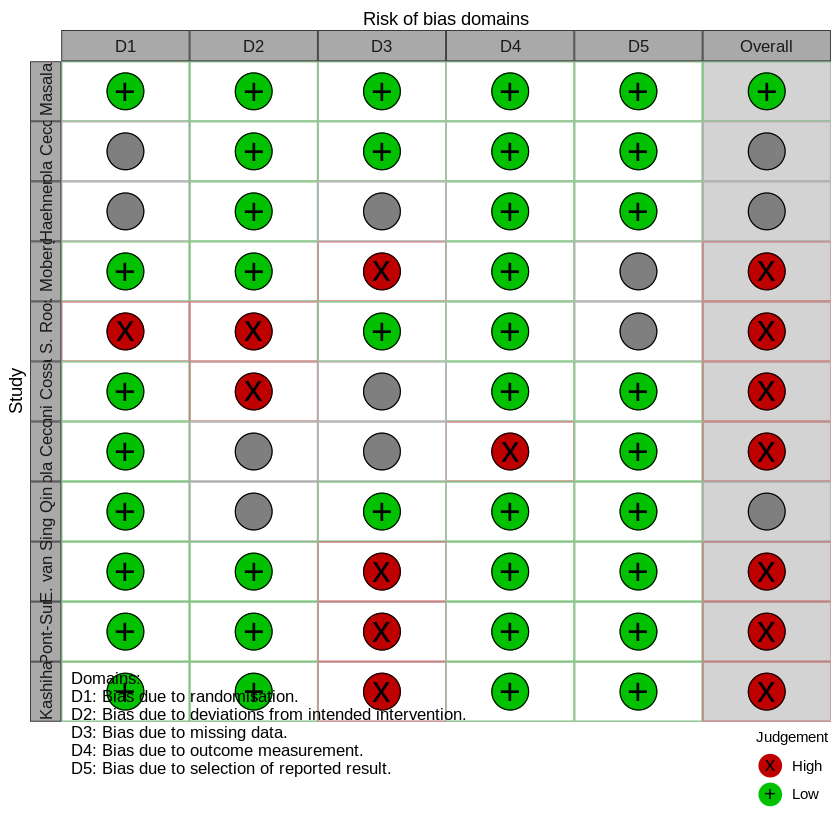

In [31]:
trafficlight_rob <- rob_traffic_light(data = mydata,
                                      tool = "ROB2",
                                      psize = 10)

trafficlight_rob

In [24]:
mydata$D1

[1] "Low"            "Some concerns"  "No information" "Low"           
 [5] "High"           "Low"            "Low"            "Low"           
 [9] "Low"            "Low"            "Low"

In [23]:
data_rob2$D1

[1] Low           Some concerns Some concerns Low           High         
[6] Low           Low           Low           Low          
Levels: High Low Some concerns

In [22]:
data_rob2

Study,D1,D2,D3,D4,D5,Overall,Weight
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
Study 1,Low,Low,Low,Low,Low,Low,33.3333333
Study 2,Some concerns,Low,Low,Low,Low,Low,33.3333333
Study 3,Some concerns,Low,Some concerns,Low,Low,Some concerns,0.1428571
Study 4,Low,Low,High,Low,Some concerns,High,9.0909091
Study 5,High,High,Low,Low,Some concerns,Low,12.5000000
Study 6,Low,High,Some concerns,Low,Low,Some concerns,25.0000000
Study 7,Low,Some concerns,Some concerns,High,Low,Some concerns,200.0000000
Study 8,Low,Some concerns,Low,Low,Low,Low,11.1111111
Study 9,Low,Low,High,Low,Low,High,1.1111111


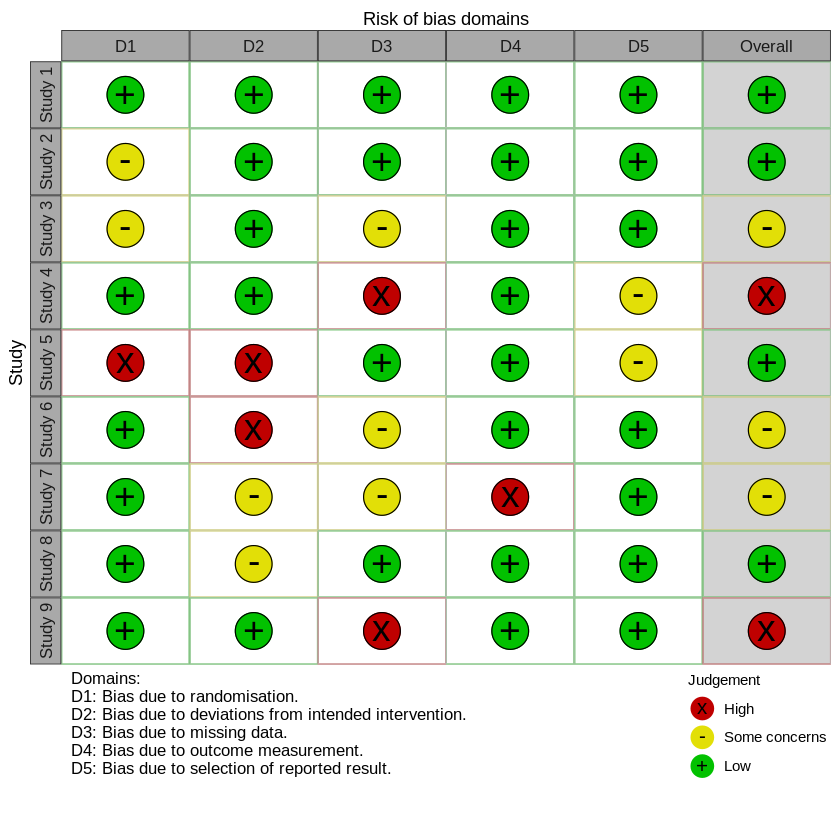

In [20]:
trafficlight_rob <- rob_traffic_light(data = data_rob2,
                                      tool = "ROB2",
                                      psize = 10)

trafficlight_rob

In [ ]:
rob_save(trafficlight_rob, "rob_fig.png")

In [5]:
png("hist1.png", width = 18, height = 18, units = 'cm', res = 300)
tb1 %>% ggplot(aes(x=tests1, y = n)) + geom_bar(stat='identity') +  theme_bw()  +
    theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank(),
          axis.text.x = element_text(angle= 45, vjust = .5)) +
#          axis.text.y = element_blank() +
    theme(legend.position = "bottom", text = element_text(size = 16), plot.title = element_text(hjust = 0.5, size = 20) ) +
    xlab('Methods') + ylab('Count') + ggtitle('Testing methods used in 19 studies')
dev.off()

png 
  2

In [ ]:
png("hist1.png", width = 18, height = 8, units = 'cm', res = 300)
tb1 %>% ggplot(aes(x=tests1, y = n)) + geom_bar(stat='identity') +  theme_bw()  + coord_flip() + 
    theme(axis.line = element_blank(),
#          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          strip.background = element_blank()) +
#          axis.text.x = element_text(angle= 45, vjust = .5)) +
#          axis.text.y = element_blank() +
    theme(legend.position = "bottom", text = element_text(size = 16), plot.title = element_text(hjust = 0.5, size = 20) ) +
    xlab('Methods') + ylab('Count') + ggtitle('Testing methods used in 19 studies')
    dev.off()

png 
  2

In [ ]:


data[,2]

[1] "Carla Masala"                 "Maria Paola Cecchini"        
 [3] "Antje Haehner"                "Paul J. Moberg"              
 [5] "Dareia S. Roos"               "Giovanni Cossu"              
 [7] "Maria Paola Cecchini"         "Xiaoling Qin"                
 [9] "Marijolein A.E. van Stiphout" "Claustre Pont-Sunyer"        
[11] "Kenichi Kashihara"

In [ ]:
data$authoryear = paste(data[,2], data$year, sep=" ")
head(data)

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,1,Carla Masala,2020,Brain science,prospective,single,69.20,67.9,taste strip test,63,8.0000,3.9,49,11.3000,3.1,Carla Masala 2020
2,3,Maria Paola Cecchini,2019,Journal of neural transmission,prospective,single,68.10,67.5,"WMT,taste strip test",50,11.6000,2.4,50,12.2000,2.2,Maria Paola Cecchini 2019
3,5,Antje Haehner,2019,Journal of Neurology,prospective,single,63.70,58.8,taste strip test,45,12.7000,4.0,429,15.6000,6.1,Antje Haehner 2019
4,9,Paul J. Moberg,2007,Cog Behav Neurol,prospective,single,74.70,70.8,PTU,36,0.4500,NA,20,0.7500,NA,Paul J. Moberg 2007
5,11,Dareia S. Roos,2018,Journal of neural transmission,prospective,single,65.90,65.9,taste strip test,63,9.8600,2.9,63,9.6700,2.9,Dareia S. Roos 2018
6,13,Giovanni Cossu,2018,Movement disorders,prospective,single,69.03,61.2,PTU,109,0.4587,NA,131,0.6565,NA,Giovanni Cossu 2018


In [ ]:
#install.packages("metafor")
#install.packages("meta")
#install.packages("weightr")
install.packages(c("metafor","meta"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘metadat’, ‘mathjaxr’, ‘pbapply’, ‘lme4’, ‘CompQuadForm’




In [ ]:
library(metafor)
library(meta)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: metadat


Loading the 'metafor' package (version 3.8-1). For an
introduction to the package please type: help(metafor)


Loading 'meta' package (version 6.0-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs



In [ ]:
data_tst = data[ c(1,2,3,5,7), ]
data_ptu = data[ c(4,6), ]
data_qn = data[ 8:11, ]

In [ ]:
data_tst

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
1,1,Carla Masala,2020,Brain science,prospective,single,69.2,67.9,taste strip test,63,8.00,3.9,49,11.30,3.1,Carla Masala 2020
2,3,Maria Paola Cecchini,2019,Journal of neural transmission,prospective,single,68.1,67.5,"WMT,taste strip test",50,11.60,2.4,50,12.20,2.2,Maria Paola Cecchini 2019
3,5,Antje Haehner,2019,Journal of Neurology,prospective,single,63.7,58.8,taste strip test,45,12.70,4.0,429,15.60,6.1,Antje Haehner 2019
5,11,Dareia S. Roos,2018,Journal of neural transmission,prospective,single,65.9,65.9,taste strip test,63,9.86,2.9,63,9.67,2.9,Dareia S. Roos 2018
7,16,Maria Paola Cecchini,2014,J Neural transm,prospective,single,70.1,67.0,"WMT,taste strip test",61,11.00,2.8,66,12.20,2.1,Maria Paola Cecchini 2014


In [ ]:
data_ptu

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
4,9,Paul J. Moberg,2007,Cog Behav Neurol,prospective,single,74.70,70.8,PTU,36,16,20,20,15,5,Paul J. Moberg 2007
6,13,Giovanni Cossu,2018,Movement disorders,prospective,single,69.03,61.2,PTU,109,50,59,131,86,45,Giovanni Cossu 2018


In [ ]:
data_qn

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
8,4,Xiaoling Qin,2019,Parkinson's disease,retrospective,single,67.97,66.24,questionaire,108,40,68,100,17,83,Xiaoling Qin 2019
9,8,Marijolein A.E. van Stiphout,2018,Parkinson's disease,prospective,single,70.20,67.90,questionaire,74,17,57,74,1,73,Marijolein A.E. van Stiphout 2018
10,14,Claustre Pont-Sunyer,2015,Movement disorders,prospective,multi,66.60,65.70,questionaire,109,15,94,107,1,106,Claustre Pont-Sunyer 2015
11,17,Kenichi Kashihara,2011,Internal Medicine,prospective,single,72.40,70.90,questionaire,295,27,268,61,0,61,Kenichi Kashihara 2011


## TST 데이터

In [ ]:
m1 <- metacont(ne, meane, sde, nc, meanc, sdc, studlab=authoryear, data = data_tst, sm = "SMD")

In [ ]:
summary(m1)

                              SMD             95%-CI %W(common) %W(random)
Carla Masala 2020         -0.9173 [-1.3101; -0.5245]       16.4       19.0
Maria Paola Cecchini 2019 -0.2586 [-0.6523;  0.1351]       16.3       19.0
Antje Haehner 2019        -0.4878 [-0.7965; -0.1791]       26.5       21.5
Dareia S. Roos 2018        0.0651 [-0.2842;  0.4144]       20.7       20.3
Maria Paola Cecchini 2014 -0.4847 [-0.8380; -0.1314]       20.2       20.2

Number of studies combined: k = 5
Number of observations: o = 939

                         SMD             95%-CI     z  p-value
Common effect model  -0.4058 [-0.5646; -0.2469] -5.01 < 0.0001
Random effects model -0.4130 [-0.7225; -0.1035] -2.62   0.0089

Quantifying heterogeneity:
 tau^2 = 0.0910 [0.0106; 1.0319]; tau = 0.3017 [0.1031; 1.0158]
 I^2 = 72.4% [30.6%; 89.0%]; H = 1.90 [1.20; 3.02]

Test of heterogeneity:
     Q d.f. p-value
 14.49    4  0.0059

Details on meta-analytical method:
- Inverse variance method
- Restricted maximum-lik

In [ ]:

m1

Number of studies combined: k = 5
Number of observations: o = 939

                         SMD             95%-CI     z  p-value
Common effect model  -0.4058 [-0.5646; -0.2469] -5.01 < 0.0001
Random effects model -0.4130 [-0.7225; -0.1035] -2.62   0.0089

Quantifying heterogeneity:
 tau^2 = 0.0910 [0.0106; 1.0319]; tau = 0.3017 [0.1031; 1.0158]
 I^2 = 72.4% [30.6%; 89.0%]; H = 1.90 [1.20; 3.02]

Test of heterogeneity:
     Q d.f. p-value
 14.49    4  0.0059

Details on meta-analytical method:
- Inverse variance method
- Restricted maximum-likelihood estimator for tau^2
- Q-Profile method for confidence interval of tau^2 and tau
- Hedges' g (bias corrected standardised mean difference; using exact formulae)

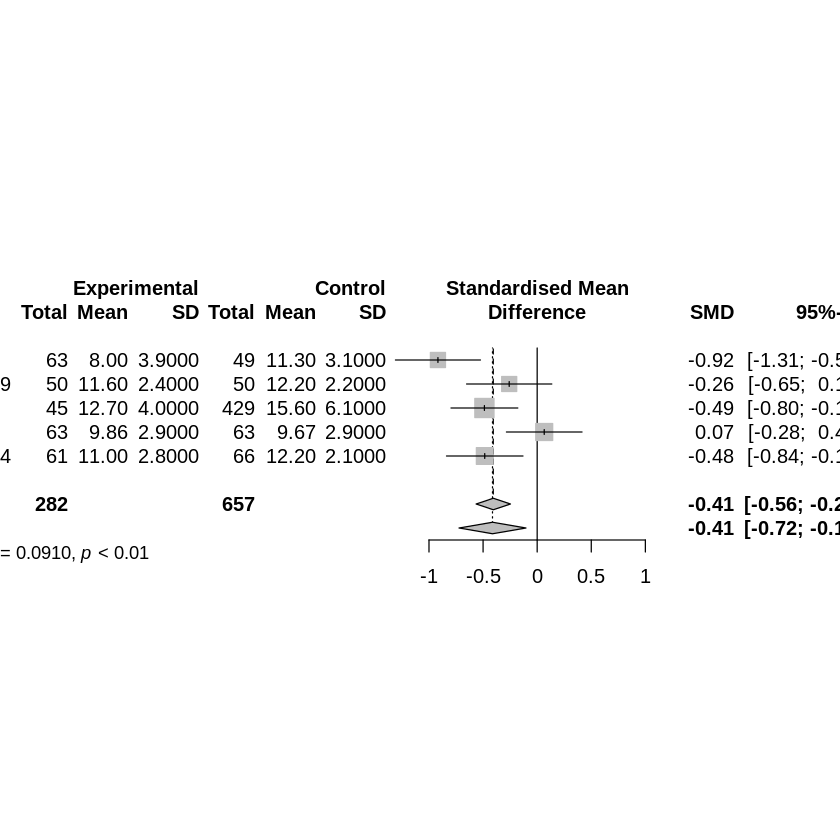

In [ ]:
forest(m1)

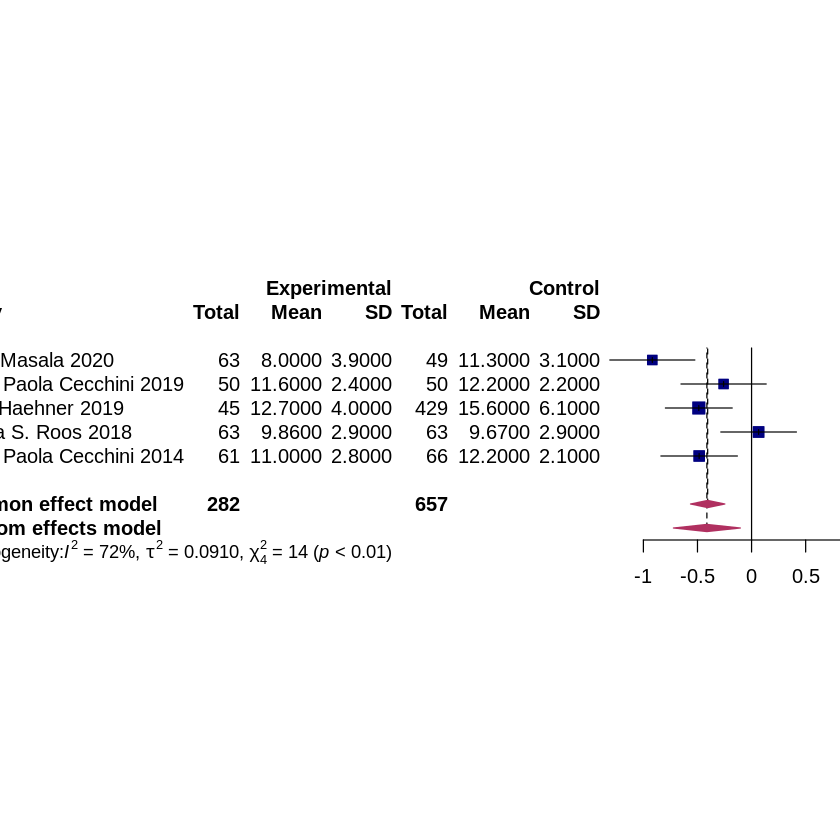

In [ ]:
forest(m1,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)

In [ ]:

png("forest_tst.png", width = 18, height = 7, units = 'cm', res = 300)
forest(m1,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=8,
       fs.study=8,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)
dev.off()

png 
  2

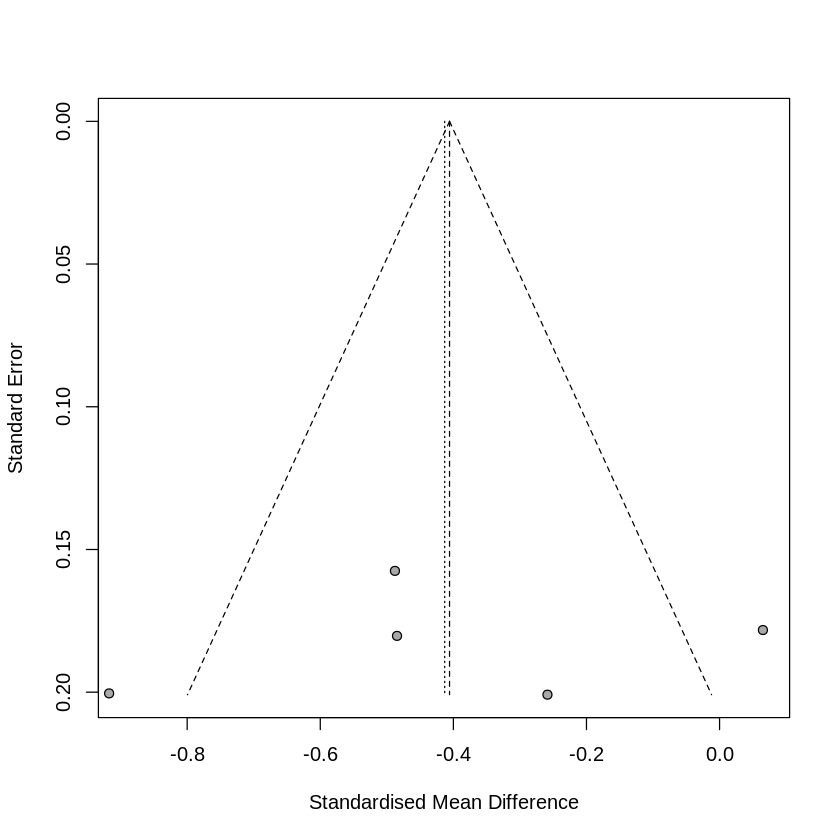

In [ ]:
funnel.meta(m1)

In [ ]:
metabias(m1, k.min=5)

Linear regression test of funnel plot asymmetry

Test result: t = -0.31, df = 3, p-value = 0.7774

Sample estimates:
    bias se.bias intercept se.intercept
 -3.2781 10.6030    0.1858       1.9215

Details:
- multiplicative residual heterogeneity variance (tau^2 = 4.6822)
- predictor: standard error
- weight:    inverse variance
- reference: Egger et al. (1997), BMJ

In [ ]:
metareg(hidemeta_FB_Farm_S, ~ StudyDesign)

## PTU 데이터

In [ ]:
data_ptu

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
4,9,Paul J. Moberg,2007,Cog Behav Neurol,prospective,single,74.70,70.8,PTU,36,16,20,20,15,5,Paul J. Moberg 2007
6,13,Giovanni Cossu,2018,Movement disorders,prospective,single,69.03,61.2,PTU,109,50,59,131,86,45,Giovanni Cossu 2018


In [ ]:

m1 <- metabin(meane, ne, meanc, nc, studlab=authoryear, data = data_ptu, sm = "RR")

In [ ]:
summary(m1)

                        RR           95%-CI %W(common) %W(random)
Paul J. Moberg 2007 0.5926 [0.3800; 0.9241]       19.8       22.4
Giovanni Cossu 2018 0.6987 [0.5504; 0.8870]       80.2       77.6

Number of studies combined: k = 2
Number of observations: o = 296
Number of events: e = 167

                         RR           95%-CI     z p-value
Common effect model  0.6777 [0.5488; 0.8369] -3.61  0.0003
Random effects model 0.6734 [0.5458; 0.8310] -3.69  0.0002

Quantifying heterogeneity:
 tau^2 = 0; tau = 0; I^2 = 0.0%; H = 1.00

Test of heterogeneity:
    Q d.f. p-value
 0.41    1  0.5219

Details on meta-analytical method:
- Mantel-Haenszel method
- Restricted maximum-likelihood estimator for tau^2

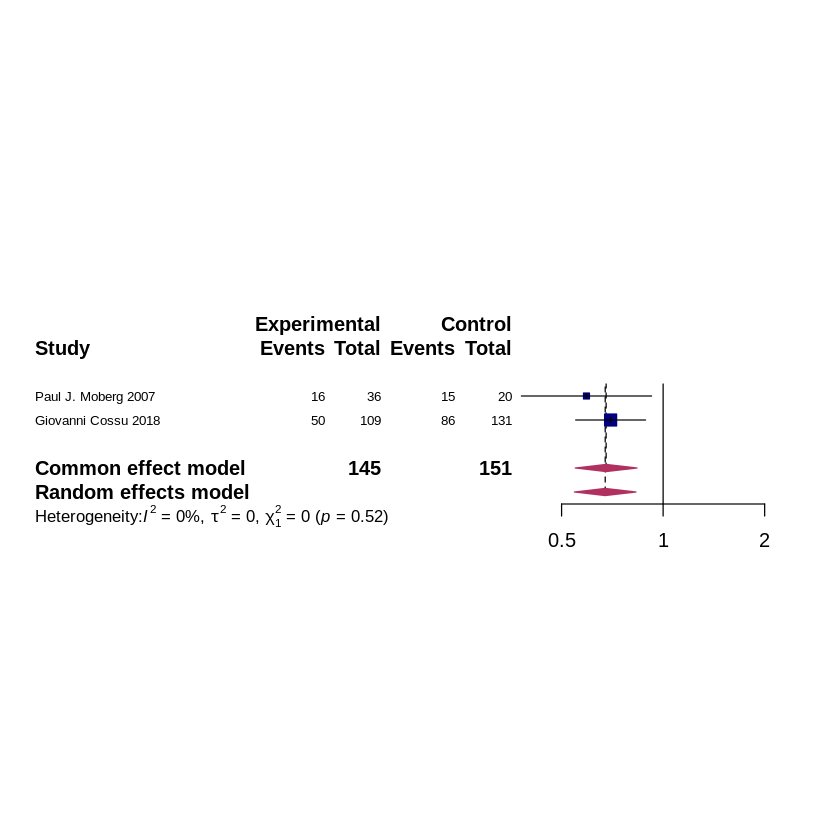

In [ ]:
forest(m1,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=8,
       fs.study=8,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)


In [ ]:
png("forest_ptu.png", width = 18, height = 7, units = 'cm', res = 300)
forest(m1,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=8,
       fs.study=8,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)
dev.off()

png 
  2

In [ ]:
dat <- escalc("OR", ai=meane	, n1i=ne, ci=meanc, n2i=nc, slab=authoryear, data=data_ptu)
dat

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear,yi,vi
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
4,9,Paul J. Moberg,2007,Cog Behav Neurol,prospective,single,74.70,70.8,PTU,36,16,20,20,15,5,Paul J. Moberg 2007,-1.3217558,0.37916667
6,13,Giovanni Cossu,2018,Movement disorders,prospective,single,69.03,61.2,PTU,109,50,59,131,86,45,Giovanni Cossu 2018,-0.8131992,0.07079928


In [ ]:
# equal-effects model analysis

res <- rma(yi, vi, data=dat, method="EE", digits=2)
res


Equal-Effects Model (k = 2)

I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  0.57

Test for Heterogeneity:
Q(df = 1) = 0.57, p-val = 0.45

Model Results:

estimate    se   zval  pval  ci.lb  ci.ub      
   -0.89  0.24  -3.66  <.01  -1.37  -0.41  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
predict(res, transf=exp)


 pred ci.lb ci.ub 
 0.41  0.25  0.66 


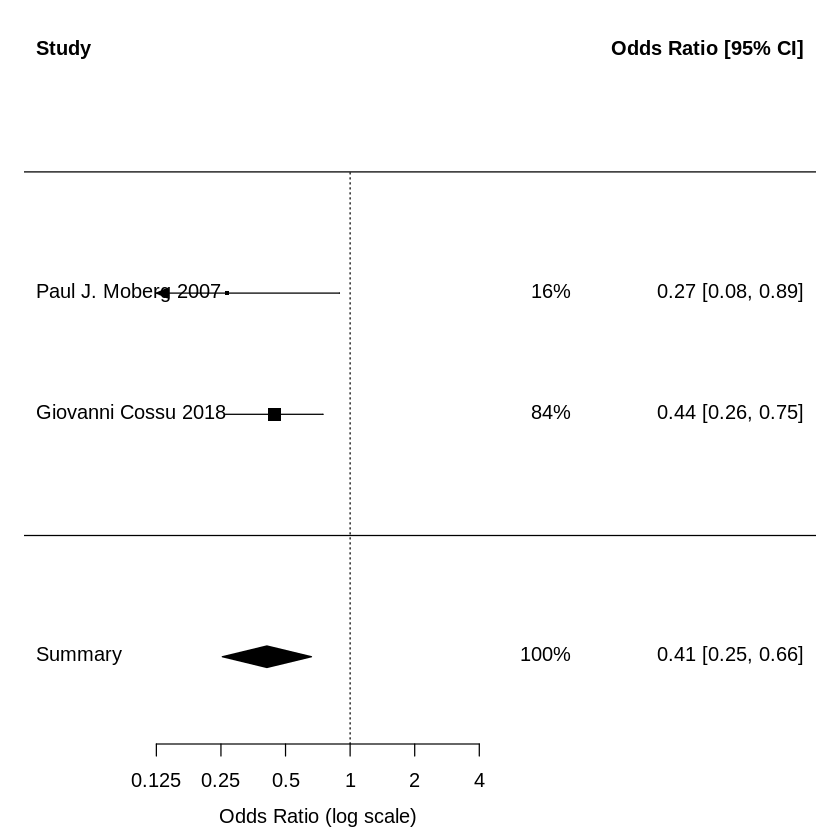

In [ ]:
par(mar=c(4,4,2,2))

dat$weights <- paste0(round(weights(res)), "%") # weights in % (rounded)

forest(res, xlim=c(-3.5,5), header=TRUE, top=2, mlab="Summary",
       atransf=exp, at=log(c(.125, .25, .5, 1, 2, 4)), digits=c(2L,3L),
       ilab=dat$weights, ilab.xpos=2.5, ilab.pos=2, efac=c(0,1,1.5))
text(2.5, -1, "100%", pos=2)
text(2.5,  8, "Weight", pos=2, font=2)

In [ ]:
# random-effects model analysis

res <- rma(yi, vi, data=dat, method="DL", digits=2)
res


Random-Effects Model (k = 2; tau^2 estimator: DL)

tau^2 (estimated amount of total heterogeneity): 0 (SE = 0.32)
tau (square root of estimated tau^2 value):      0
I^2 (total heterogeneity / total variability):   0.00%
H^2 (total variability / sampling variability):  1.00

Test for Heterogeneity:
Q(df = 1) = 0.57, p-val = 0.45

Model Results:

estimate    se   zval  pval  ci.lb  ci.ub      
   -0.89  0.24  -3.66  <.01  -1.37  -0.41  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


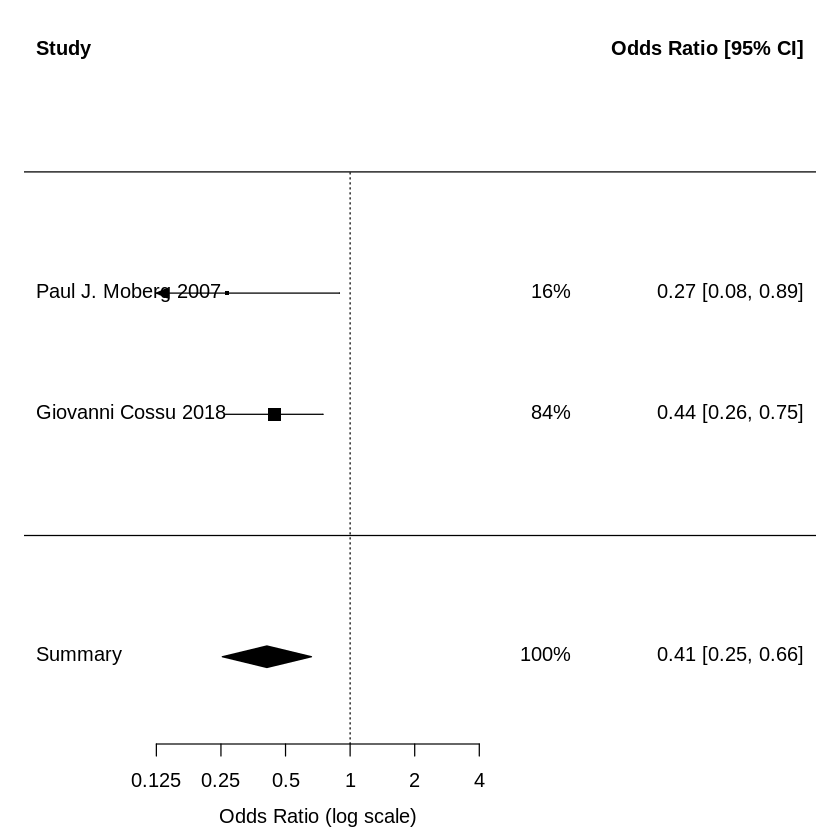

In [ ]:
# Figure 14.4

par(mar=c(4,4,2,2))

dat$weights <- paste0(round(weights(res)), "%") # weights in % (rounded)

forest(res, xlim=c(-3.5,5), header=TRUE, top=2, mlab="Summary",
       atransf=exp, at=log(c(.125, .25, .5, 1, 2, 4)), digits=c(2L,3L),
       ilab=dat$weights, ilab.xpos=2.5, ilab.pos=2, efac=c(0,1,1.5))
text(2.5, -1, "100%", pos=2)
text(2.5,  8, "Weight", pos=2, font=2)

In [ ]:
png("forest_ptu.png", width = 18, height = 7, units = 'cm', res = 300)
forest(m1,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=7,
       fs.study=7,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)
dev.off()

png 
  2

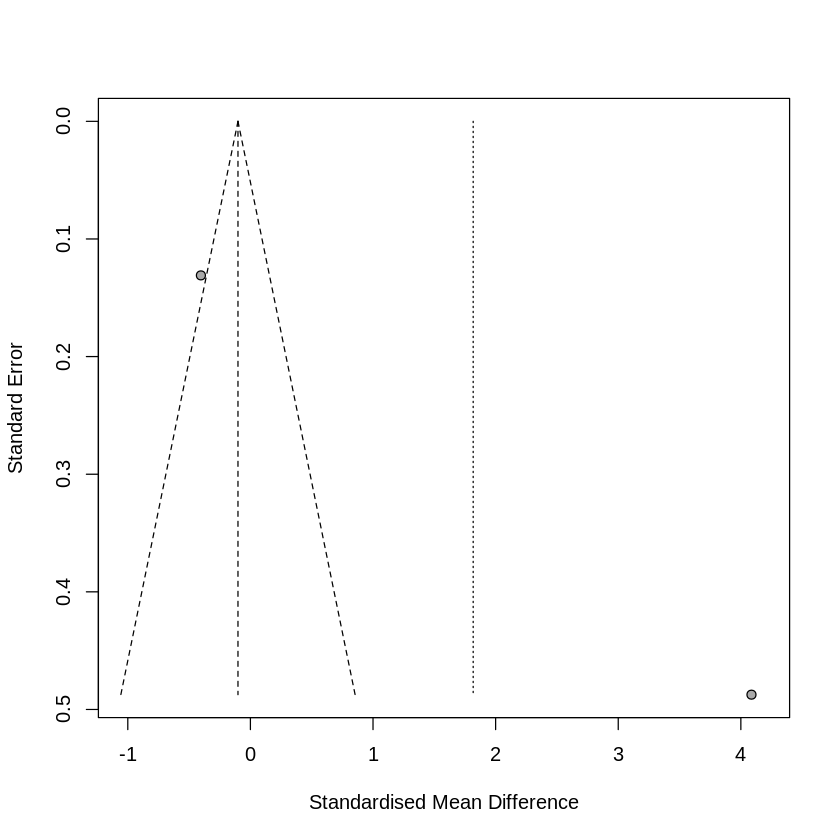

In [ ]:
funnel.meta(m2)

In [ ]:
ies.logit=escalc(xi=sepsis_d,ni=sepsis_tot,measure="PLO",data=subd)  ## PLO 가 logit transformation 하는 부분
pes.logit=rma(yi,vi,data=ies.logit,method="DL",weighted=TRUE)  ## rma 는 random effect model , DL 은 이질성의 정도(degree of heterogeneity)
pes=predict(pes.logit,transf=transf.ilogit)  ## logit 변환한거 proportion 으로 되돌림
print(pes,digits=6);print(pes.logit,digits=4);confint(pes.logit,digits=2)

## QN 데이터

In [ ]:
data_qn

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
8,4,Xiaoling Qin,2019,Parkinson's disease,retrospective,single,67.97,66.24,questionaire,108,40,68,100,17,83,Xiaoling Qin 2019
9,8,Marijolein A.E. van Stiphout,2018,Parkinson's disease,prospective,single,70.20,67.90,questionaire,74,17,57,74,1,73,Marijolein A.E. van Stiphout 2018
10,14,Claustre Pont-Sunyer,2015,Movement disorders,prospective,multi,66.60,65.70,questionaire,109,15,94,107,1,106,Claustre Pont-Sunyer 2015
11,17,Kenichi Kashihara,2011,Internal Medicine,prospective,single,72.40,70.90,questionaire,295,27,268,61,0,61,Kenichi Kashihara 2011


In [ ]:

m1 <- metabin(meane, ne, meanc, nc, studlab=authoryear, data = data_qn, sm = "RR")

In [ ]:
summary(m1)

                                       RR             95%-CI %W(common)
Xiaoling Qin 2019                  2.1786 [1.3240;   3.5849]       86.2
Marijolein A.E. van Stiphout 2018 17.0000 [2.3218; 124.4736]        4.9
Claustre Pont-Sunyer 2015         14.7248 [1.9797; 109.5218]        4.9
Kenichi Kashihara 2011            11.4467 [0.7077; 185.1323]        4.0
                                  %W(random)
Xiaoling Qin 2019                       42.7
Marijolein A.E. van Stiphout 2018       21.6
Claustre Pont-Sunyer 2015               21.4
Kenichi Kashihara 2011                  14.3

Number of studies combined: k = 4
Number of observations: o = 928
Number of events: e = 118

                         RR            95%-CI    z  p-value
Common effect model  3.8969 [2.4423;  6.2180] 5.71 < 0.0001
Random effects model 6.4797 [1.8144; 23.1398] 2.88   0.0040

Quantifying heterogeneity:
 tau^2 = 0.9234 [0.0000; 12.2348]; tau = 0.9610 [0.0000; 3.4978]
 I^2 = 61.2% [0.0%; 87.0%]; H = 1.61 [1.00; 2.78

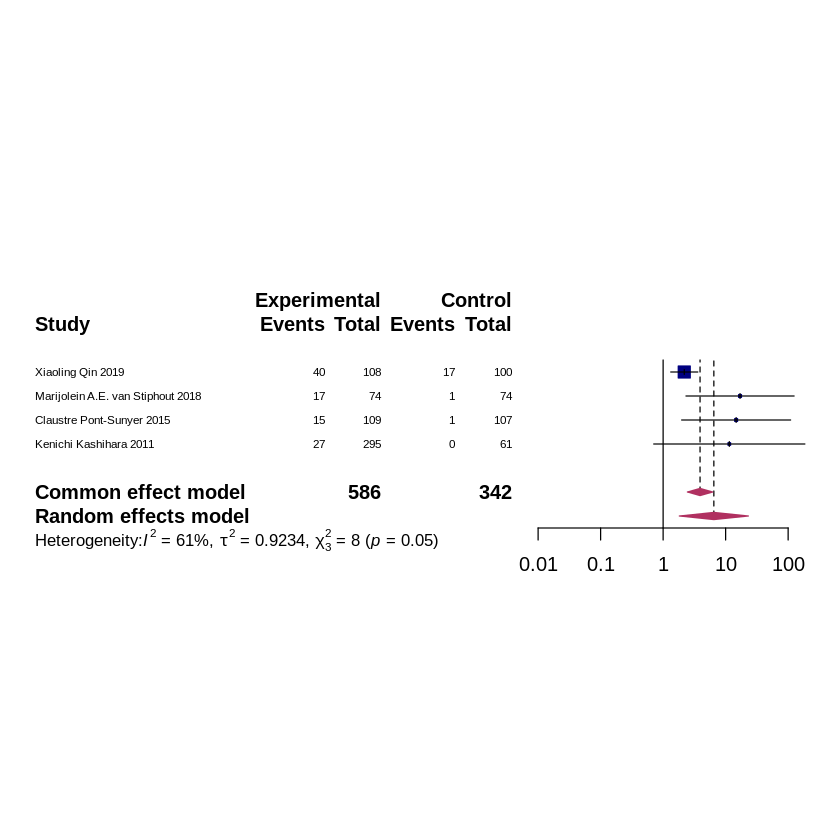

In [ ]:
forest(m1,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=7,
       fs.study=7,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)

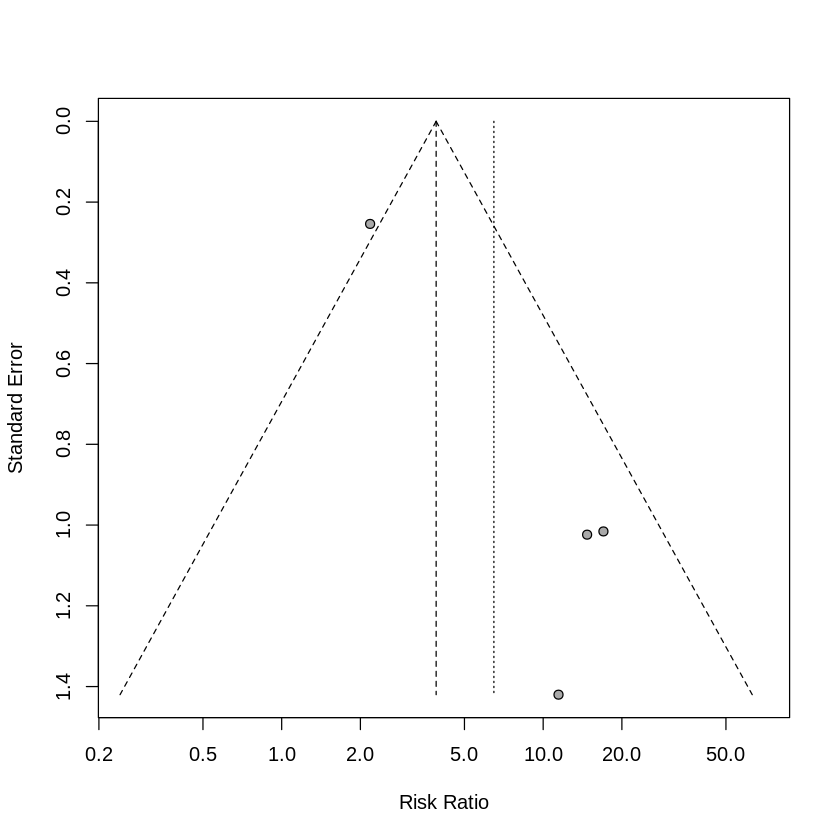

In [ ]:
funnel.meta(m1)

In [ ]:
png("forest_qn.png", width = 18, height = 7, units = 'cm', res = 300)
forest(m1,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=7,
       fs.study=7,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)
dev.off()

png 
  2

In [ ]:
dat <- escalc("OR", ai=meane	, n1i=ne, ci=meanc, n2i=nc, slab=authoryear, data=data_qn)
dat

,ID,First.Author,year,Journal,Study.design,center,P_avg_age,C_avg_age,Type_gustatory,ne,meane,sde,nc,meanc,sdc,authoryear,yi,vi
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
8,4,Xiaoling Qin,2019,Parkinson's disease,retrospective,single,67.97,66.24,questionaire,108,40,68,100,17,83,Xiaoling Qin 2019,1.054999,0.1105776
9,8,Marijolein A.E. van Stiphout,2018,Parkinson's disease,prospective,single,70.20,67.90,questionaire,74,17,57,74,1,73,Marijolein A.E. van Stiphout 2018,3.080622,1.0900660
10,14,Claustre Pont-Sunyer,2015,Movement disorders,prospective,multi,66.60,65.70,questionaire,109,15,94,107,1,106,Claustre Pont-Sunyer 2015,2.828195,1.0867389
11,17,Kenichi Kashihara,2011,Internal Medicine,prospective,single,72.40,70.90,questionaire,295,27,268,61,0,61,Kenichi Kashihara 2011,2.533519,2.0563482


In [ ]:
# equal-effects model analysis

res <- rma(yi, vi, data=dat, method="EE", digits=2)
res


Equal-Effects Model (k = 4)

I^2 (total heterogeneity / total variability):   51.31%
H^2 (total variability / sampling variability):  2.05

Test for Heterogeneity:
Q(df = 3) = 6.16, p-val = 0.10

Model Results:

estimate    se  zval  pval  ci.lb  ci.ub      
    1.43  0.30  4.81  <.01   0.84   2.01  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
predict(res, transf=exp)


 pred ci.lb ci.ub 
 4.16  2.33  7.44 


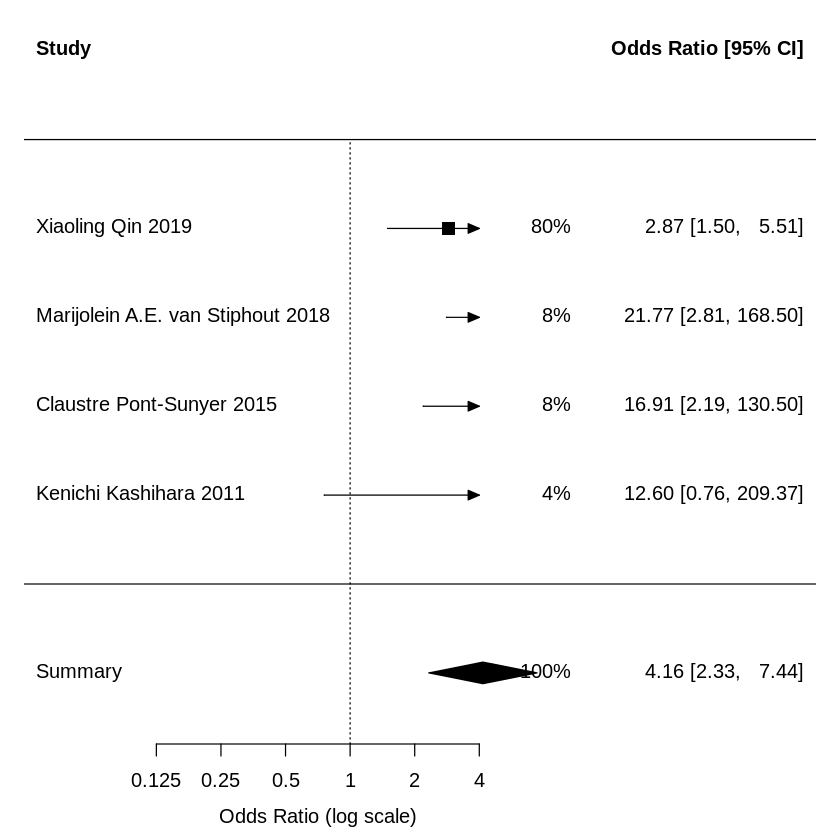

In [ ]:
par(mar=c(4,4,2,2))

dat$weights <- paste0(round(weights(res)), "%") # weights in % (rounded)

forest(res, xlim=c(-3.5,5), header=TRUE, top=2, mlab="Summary",
       atransf=exp, at=log(c(.125, .25, .5, 1, 2, 4)), digits=c(2L,3L),
       ilab=dat$weights, ilab.xpos=2.5, ilab.pos=2, efac=c(0,1,1.5))
text(2.5, -1, "100%", pos=2)
text(2.5,  8, "Weight", pos=2, font=2)

In [ ]:
# random-effects model analysis

res <- rma(yi, vi, data=dat, method="DL", digits=2)
res


Random-Effects Model (k = 4; tau^2 estimator: DL)

tau^2 (estimated amount of total heterogeneity): 0.79 (SE = 1.32)
tau (square root of estimated tau^2 value):      0.89
I^2 (total heterogeneity / total variability):   51.31%
H^2 (total variability / sampling variability):  2.05

Test for Heterogeneity:
Q(df = 3) = 6.16, p-val = 0.10

Model Results:

estimate    se  zval  pval  ci.lb  ci.ub     
    2.06  0.63  3.28  <.01   0.83   3.29  ** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


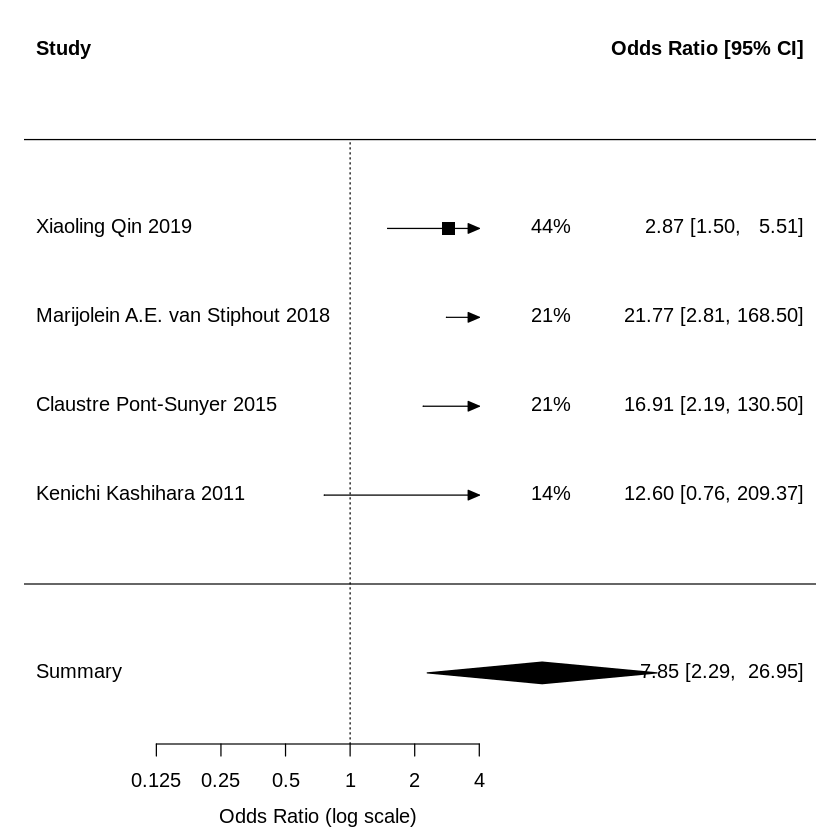

In [ ]:
# Figure 14.4

par(mar=c(4,4,2,2))

dat$weights <- paste0(round(weights(res)), "%") # weights in % (rounded)

forest(res, xlim=c(-3.5,5), header=TRUE, top=2, mlab="Summary",
       atransf=exp, at=log(c(.125, .25, .5, 1, 2, 4)), digits=c(2L,3L),
       ilab=dat$weights, ilab.xpos=2.5, ilab.pos=2, efac=c(0,1,1.5))
text(2.5, -1, "100%", pos=2)
text(2.5,  8, "Weight", pos=2, font=2)

In [ ]:
png("forest_ptu.png", width = 18, height = 7, units = 'cm', res = 300)
forest(m2,
#       sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       fs.xlab=7,
       fs.study=7,
       fs.study.lables=10,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)
dev.off()

png 
  2

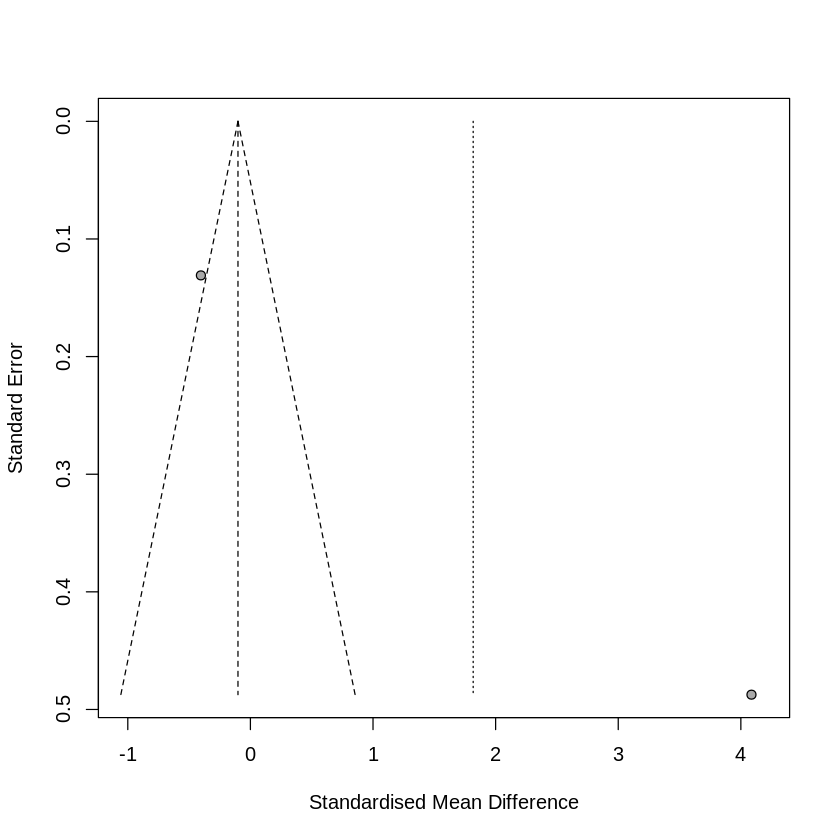

In [ ]:
funnel.meta(m2)

In [ ]:
ies.logit=escalc(xi=sepsis_d,ni=sepsis_tot,measure="PLO",data=subd)  ## PLO 가 logit transformation 하는 부분
pes.logit=rma(yi,vi,data=ies.logit,method="DL",weighted=TRUE)  ## rma 는 random effect model , DL 은 이질성의 정도(degree of heterogeneity)
pes=predict(pes.logit,transf=transf.ilogit)  ## logit 변환한거 proportion 으로 되돌림
print(pes,digits=6);print(pes.logit,digits=4);confint(pes.logit,digits=2)

In [ ]:
subd[,'sepsis_d'] / subd[,'sepsis_tot']

[1] 0.21669107 0.25961538 0.40604027 0.09723757 0.16216216 0.09718670
 [7] 0.22537879 0.25217736 0.18548387 0.21649485 0.21808511 0.19769504
[13] 0.26421405 0.17699115 0.16000000 0.35789474 0.21918260 0.16666667
[19] 0.08936170 0.17692308 0.26717557

In [ ]:
subd['sepsis_prop'] = subd[,'sepsis_d'] / subd[,'sepsis_tot']

In [ ]:

subd %>% head

,Author,Year,Period,Center,Center.name,sepsis_d,sepsis_tot,authoryear,sepsis_prop
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,You,2022,November 2015 to December 2017,multicenter,Korean Shock Society (11개병원),444,2049,You 2022,0.21669107
2,Lee,2022,"September 1, 2019, and February 29, 2020",multicenter,Korean Sepsis Alliance (KSA) investigators - 16개병원,243,936,Lee 2022,0.25961538
3,Yeo,2022,September 2019 and February 2020,multicenter,Korean Sepsis Alliance,121,298,Yeo 2022,0.40604027
4,Oh,2022,July 2008 to March 2019,single,세브란스,88,905,Oh 2022,0.09723757
5,Im,2021,April 2014 to January 2019,single,삼성병원 레지스트리,12,74,Im 2021,0.16216216
6,Kim,2021,January 2016 and February 2019,single,세브란스 병원,38,391,Kim 2021,0.09718670


In [ ]:
library(metafor)
library(meta)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: metadat


Loading the 'metafor' package (version 3.8-1). For an
introduction to the package please type: help(metafor)


Loading 'meta' package (version 5.5-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs



In [ ]:
m1 <- metacont(ne, meane, sde, nc, meanc, sdc, data = data, sm = "SMD")

In [ ]:
res <- rma(yi, vi, data=data, method="DL")

In [ ]:
bb

## Calculating overall summary proportion

logit 변환: 이유 -> proportion 이 0.2 근처라 정규분포로 보기 애매한 면이 있어 로그변환 취해서 해주는것이 더 좋음 

In [ ]:
ies.logit=escalc(xi=sepsis_d,ni=sepsis_tot,measure="PLO",data=subd)  ## PLO 가 logit transformation 하는 부분
pes.logit=rma(yi,vi,data=ies.logit,method="DL",weighted=TRUE)  ## rma 는 random effect model , DL 은 이질성의 정도(degree of heterogeneity)
pes=predict(pes.logit,transf=transf.ilogit)  ## logit 변환한거 proportion 으로 되돌림
print(pes,digits=6);print(pes.logit,digits=4);confint(pes.logit,digits=2)


     pred    ci.lb    ci.ub    pi.lb    pi.ub 
 0.205317 0.183886 0.228547 0.127420 0.313715 


Random-Effects Model (k = 21; tau^2 estimator: DL)

tau^2 (estimated amount of total heterogeneity): 0.0799 (SE = 0.0412)
tau (square root of estimated tau^2 value):      0.2826
I^2 (total heterogeneity / total variability):   92.94%
H^2 (total variability / sampling variability):  14.16

Test for Heterogeneity:
Q(df = 20) = 283.2237, p-val < .0001

Model Results:

estimate      se      zval    pval    ci.lb    ci.ub      
 -1.3534  0.0698  -19.3827  <.0001  -1.4902  -1.2165  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




       estimate ci.lb ci.ub 
tau^2      0.08  0.12  0.47 
tau        0.28  0.34  0.69 
I^2(%)    92.94 95.07 98.73 
H^2       14.16 20.27 78.71 


summary proportion (sepsis death rate) 은 20.5%, 95% 신뢰구간 (.1838~.2285)  

rma 가 heterogeneity 측도인 Q, I2 tau2 보여줌

$I^2$ 는 92.94% 
$tau^2$ 는 total between study variance

$Q$ 통계량이 유의미함 -> 포함된 연구들이 공통의 effect size를 공유하지 않음. -> meta analysis 결과가 많은 heterogeneity 를 포함함 : 연구들이 서로 이질적임 -> 서브그룹을 나누려는 시도 해 볼 필요가 있음




## Identifying outliers with residuals

In [ ]:
stud.res=rstudent(pes.logit)
abs.z=abs(stud.res$z)
stud.res[order(-abs.z)]


     resid     se       z 
3   1.0212 0.2871  3.5570 
4  -0.9321 0.2750 -3.3887 
19 -1.0182 0.3141 -3.2413 
6  -0.9188 0.3242 -2.8342 
16  0.8055 0.3206  2.5126 
13  0.3495 0.3041  1.1493 
2   0.3245 0.3051  1.0638 
21  0.3593 0.3528  1.0184 
8   0.2851 0.3080  0.9255 
18 -0.2665 0.3599 -0.7405 
15 -0.3133 0.4292 -0.7301 
5  -0.2969 0.4295 -0.6912 
20 -0.1909 0.3717 -0.5134 
14 -0.1900 0.3822 -0.4970 
7   0.1303 0.3212  0.4056 
9  -0.1309 0.3727 -0.3512 
17  0.0921 0.3203  0.2875 
1   0.0753 0.3138  0.2401 
10  0.0741 0.3137  0.2362 
11  0.0804 0.3426  0.2346 
12 -0.0465 0.3183 -0.1460 


Z 스코어가 2 보다 크면 outlier 로 생각 (3,4,19,6,16) 제외하면 괜찮아보임.. 제들 잘 살펴볼 필요가 있음

## Leave-one-out analysis

하나씩 제외했을 때 effect size 변화를 관찰.. outlier 는 영향을 많이줌




   estimate       zval     pval    ci.lb    ci.ub          Q       Qp     tau2 
1  0.204175 -18.010763 0.000000 0.181169 0.229283 283.112617 0.000000 0.089883 
2  0.202215 -18.864224 0.000000 0.180183 0.226198 274.069566 0.000000 0.082214 
3  0.197575 -21.347598 0.000000 0.177965 0.218771 225.481732 0.000000 0.064196 
4  0.214797 -20.402723 0.000000 0.194541 0.236544 208.375705 0.000000 0.059028 
5  0.206631 -18.989394 0.000000 0.184792 0.230322 281.812135 0.000000 0.080021 
6  0.212479 -19.210596 0.000000 0.190972 0.235702 251.256943 0.000000 0.071300 
7  0.203446 -17.626219 0.000000 0.179954 0.229149 282.497556 0.000000 0.095389 
8  0.202280 -18.387483 0.000000 0.179703 0.226909 265.335127 0.000000 0.087208 
9  0.206075 -18.905169 0.000000 0.184135 0.229892 282.380745 0.000000 0.080430 
10 0.204189 -18.015396 0.000000 0.181190 0.229291 283.097917 0.000000 0.089814 
11 0.204686 -18.892250 0.000000 0.182714 0.228562 283.221188 0.000000 0.081051 
12 0.205171 -17.594945 0.000000 0.18166

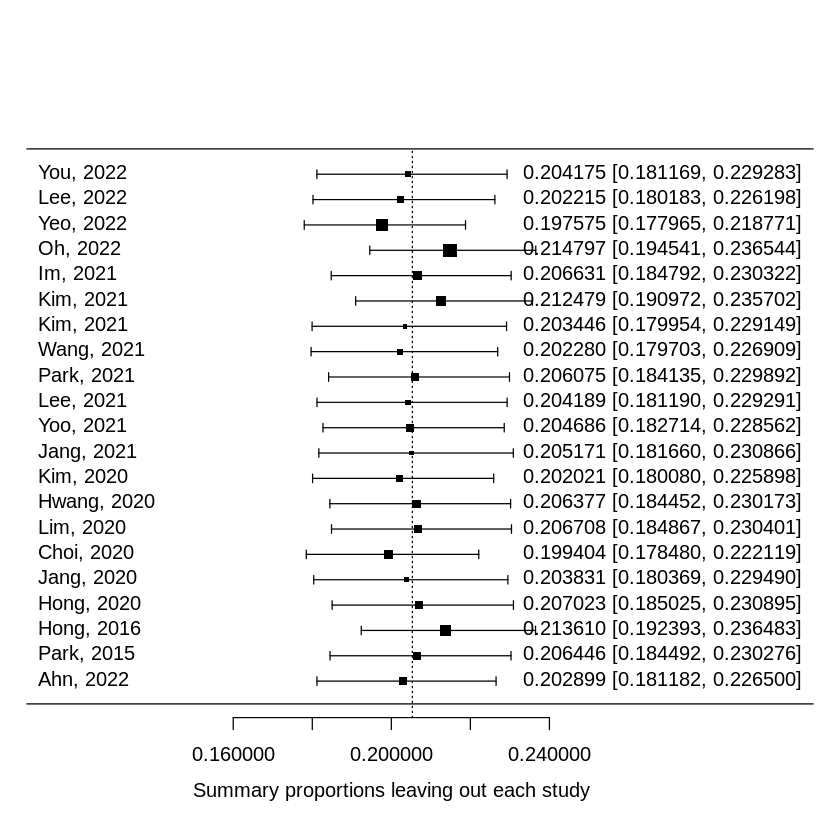

In [ ]:
l1o=leave1out(pes.logit)
yi=l1o$estimate;vi=l1o$se^2
forest(yi,vi,transf=transf.ilogit,slab=paste(subd$Author,subd$Year,sep=", "),xlab="Summary proportions leaving out each study",refline=pes$pred,digits=6)
abline(h=0.1)
L1O=leave1out(pes.logit,transf=transf.ilogit);print(L1O,digits=6)

## Baujat plot

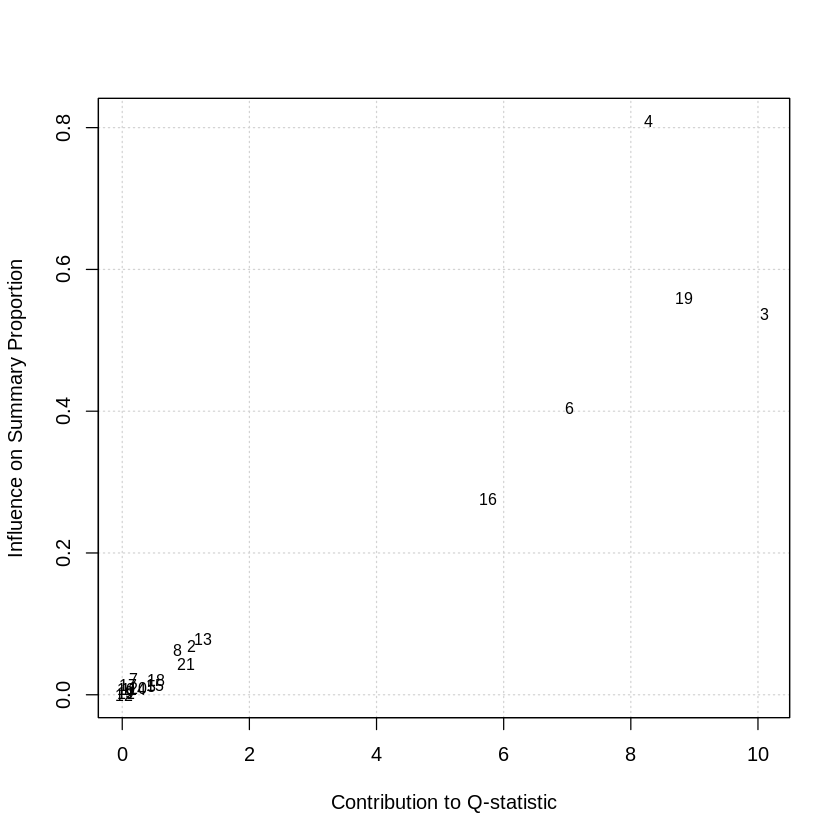

In [ ]:
baujat(pes.logit,xlab="Contribution to Q-statistic", ylab="Influence on Summary Proportion")

3,4,19,6,16 은 멀리 떨어져 있어서 outlier 로 생각됨

## Diagnostic tests


   rstudent  dffits cook.d  cov.r tau2.del   QE.del    hat weight    dfbs inf 
1    0.2401  0.0949 0.0101 1.1702   0.0899 283.1126 0.0589 5.8919  0.0957     
2    1.0638  0.2702 0.0750 1.0858   0.0822 274.0696 0.0571 5.7068  0.2706     
3    3.5570  0.7554 0.4752 0.8841   0.0642 225.4817 0.0520 5.1984  0.7531   * 
4   -3.3887 -0.9298 0.6697 0.8279   0.0590 208.3757 0.0527 5.2730 -0.9244   * 
5   -0.6912 -0.1150 0.0132 1.0295   0.0800 281.8121 0.0272 2.7186 -0.1150     
6   -2.8342 -0.6466 0.3852 0.9538   0.0713 251.2569 0.0447 4.4720 -0.6500     
7    0.4056  0.1510 0.0271 1.2299   0.0954 282.4976 0.0597 5.9688  0.1531     
8    0.9255  0.2568 0.0719 1.1421   0.0872 265.3351 0.0595 5.9476  0.2585     
9   -0.3512 -0.0663 0.0044 1.0440   0.0804 282.3807 0.0366 3.6588 -0.0662     
10   0.2362  0.0938 0.0098 1.1694   0.0898 283.0979 0.0589 5.8905  0.0945     
11   0.2346  0.0551 0.0031 1.0586   0.0811 283.2212 0.0439 4.3897  0.0551     
12  -0.1460  0.0119 0.0002 1.2151   0.0940 267.6268

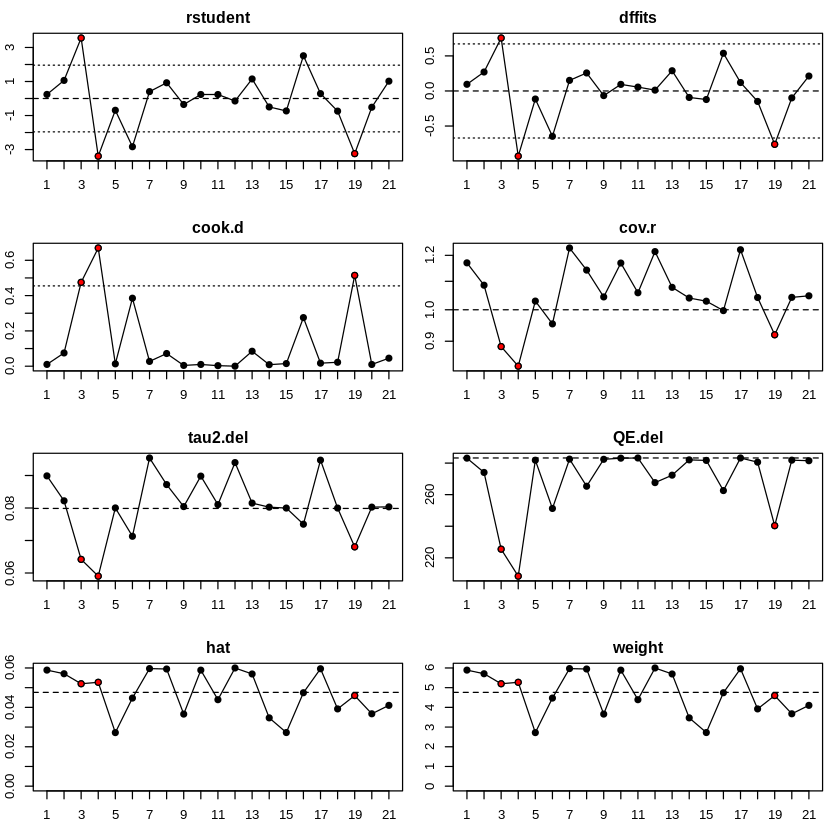

In [ ]:
inf=influence(pes.logit)
print(inf);plot(inf)

cooks distance 를 봐도 3,4, 19 가 outlier

## Removing outliers

In [ ]:
ies.logit.noutlier=escalc(xi=sepsis_d,ni=sepsis_tot,measure="PLO", data=subd[-c(3,4, 19),])
pes.logit.noutlier=rma(yi,vi,data=ies.logit.noutlier,method="DL")
pes.noutlier=predict(pes.logit.noutlier,transf=transf.ilogit)
print(pes.noutlier,digits=6)
print(pes.noutlier,digits=6);print(pes.logit.noutlier,digits=4);confint(pes.logit.noutlier,digits=2)


     pred    ci.lb    ci.ub    pi.lb    pi.ub 
 0.217450 0.200649 0.235243 0.163027 0.283879 


     pred    ci.lb    ci.ub    pi.lb    pi.ub 
 0.217450 0.200649 0.235243 0.163027 0.283879 


Random-Effects Model (k = 18; tau^2 estimator: DL)

tau^2 (estimated amount of total heterogeneity): 0.0302 (SE = 0.0173)
tau (square root of estimated tau^2 value):      0.1737
I^2 (total heterogeneity / total variability):   84.56%
H^2 (total variability / sampling variability):  6.48

Test for Heterogeneity:
Q(df = 17) = 110.1095, p-val < .0001

Model Results:

estimate      se      zval    pval    ci.lb    ci.ub      
 -1.2806  0.0519  -24.6911  <.0001  -1.3822  -1.1789  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




       estimate ci.lb ci.ub 
tau^2      0.03  0.04  0.25 
tau        0.17  0.20  0.50 
I^2(%)    84.56 88.11 97.82 
H^2        6.48  8.41 45.95 


In [ ]:
ies.logit.noutlier=escalc(xi=sepsis_d,ni=sepsis_tot,measure="PLO", data=subd[-c(3,4, 19),])
pes.logit.noutlier=rma(yi,vi,data=ies.logit.noutlier,method="DL")
pes.noutlier=predict(pes.logit.noutlier,transf=transf.ilogit)
print(pes.noutlier,digits=6)


     pred    ci.lb    ci.ub    pi.lb    pi.ub 
 0.217450 0.200649 0.235243 0.163027 0.283879 



## subgroup single 인지 multi-center 인지에 따른 계산

In [ ]:
#Pool within-group estimates of tau-squared (between-study variance):0.4427 is the combined tau^2 yielded by pooling 0.93224 and 0.24743
#Residual heterogeneity is heterogeneity not explained by the covariate (Thompson and Sharp, 1999). The results of the Test for Residual Heterogeneity show that there is significant unexplained variance left between all effect sizes in the dataset, which can explain why R^2 shows 0%
#The category that is coded as 0 (ie Birth cohort) will become the reference category (represented by the intercept).The other category coded as 1 (ie Others) will be compared against the reference category.
#The value of the intercept is the logit-transformed summary(mean) effect size of the studies in the reference category (ie Birth cohort)
#The summary effect size of the studies in the other category(ie Others) equals to -7.9742+0.3452=-7.629
#To create multivariate model:subganal.sizedesign=rma(yi,vi,data=ies.logit,mods=~samplesize+studydesign,method="DL")
subganal.studydesign=rma(yi,vi,data=ies.logit,mods=~Center,method="DL")
pes.logit.single=rma(yi,vi,data=ies.logit,mods=~Center=="single",method="DL")
pes.logit.multi=rma(yi,vi,data=ies.logit,mods=~Center=="multicenter",method="DL")
pes.subg.studydesign=predict(subganal.studydesign,transf=transf.ilogit)
dat.samevar=data.frame(estimate=c((pes.logit.single$b)[1],(pes.logit.multi$b)[1]),
                       stderror=c((pes.logit.single$se)[1],(pes.logit.multi$se)[1]),
                       tau2=subganal.studydesign$tau2)
pes.logit.studydesign=rma(estimate,sei=stderror,method="DL",data=dat.samevar) 
pes.studydesign=predict(pes.logit.studydesign,transf=transf.ilogit)
#print(pes.subg.studydesign[order(pes.subg.studydesign$pred)],digits=6)
print(subganal.studydesign,digits=4)
print(pes.subg.studydesign[1],digits=6);print(pes.subg.studydesign[17],digits=6)
print(pes.studydesign,digits=6)


Mixed-Effects Model (k = 21; tau^2 estimator: DL)

tau^2 (estimated amount of residual heterogeneity):     0.0801 (SE = 0.0424)
tau (square root of estimated tau^2 value):             0.2830
I^2 (residual heterogeneity / unaccounted variability): 92.52%
H^2 (unaccounted variability / sampling variability):   13.36
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 19) = 253.8559, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 9.6302, p-val = 0.0019

Model Results:

              estimate      se      zval    pval    ci.lb    ci.ub      
intrcpt        -1.1354  0.0991  -11.4556  <.0001  -1.3297  -0.9412  *** 
Centersingle   -0.4339  0.1398   -3.1033  0.0019  -0.7079  -0.1599   ** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


      pred    ci.lb    ci.ub    pi.lb    pi.ub 
1 0.243162 0.209212 0.280666 0.151460 0.366410 


       pred    ci.lb    ci.ub    pi.lb    pi.ub 
17 0.172314 0.146464 0.

In [ ]:
subganal.studydesign=rma(yi,vi,data=ies.logit,mods=~Center,method="DL")
pes.summary=metaprop(sepsis_d, #cases,
                     sepsis_tot, #total,
                     authoryear,
                     data=subd,
                     #sortvar(precision)
                     byvar=Center,
                     sm="PLO",
                     method.ci="NAsm",
                     method.tau="DL",
                     incr=0.5,
                     allincr=FALSE,
                     addincr=FALSE,
                     tau.common=TRUE,
                     tau.preset=sqrt(subganal.studydesign$tau2),
                     title="")

In [ ]:

pes.summary

Number of studies combined: k = 21
Number of observations: o = 22410
Number of events: e = 4823

                     proportion           95%-CI
Common effect model      0.2196 [0.2141; 0.2251]
Random effects model     0.2053 [0.1839; 0.2286]

Quantifying heterogeneity:
 tau^2 = 0.0801; tau = 0.2830; I^2 = 92.9% [90.5%; 94.7%]; H = 3.76 [3.25; 4.36]

Test of heterogeneity:
      Q d.f.  p-value
 283.22   20 < 0.0001

Results for subgroups (common effect model):
                       k proportion           95%-CI      Q   I^2
Center = multicenter   9     0.2280 [0.2216; 0.2345]  99.24 91.9%
Center = single       12     0.1929 [0.1827; 0.2036] 154.61 92.9%

Test for subgroup differences (common effect model):
                    Q d.f.  p-value
Between groups  29.37    1 < 0.0001
Within groups  253.86   19 < 0.0001

Results for subgroups (random effects model):
                       k proportion           95%-CI  tau^2    tau
Center = multicenter   9     0.2432 [0.2092; 0.2807] 0.0801

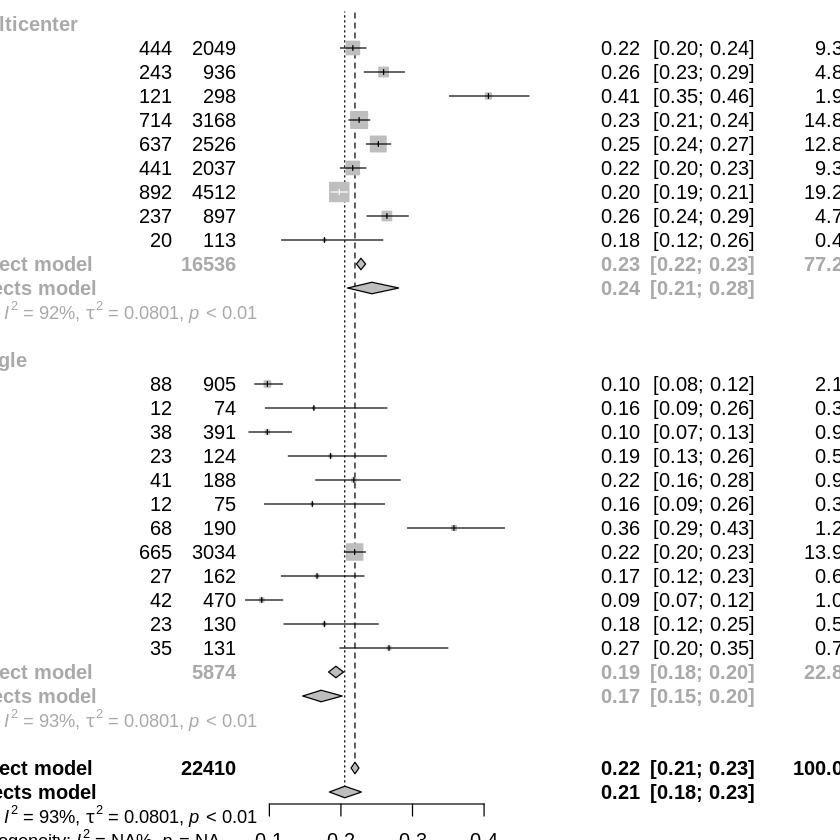

In [ ]:
forest(pes.summary)

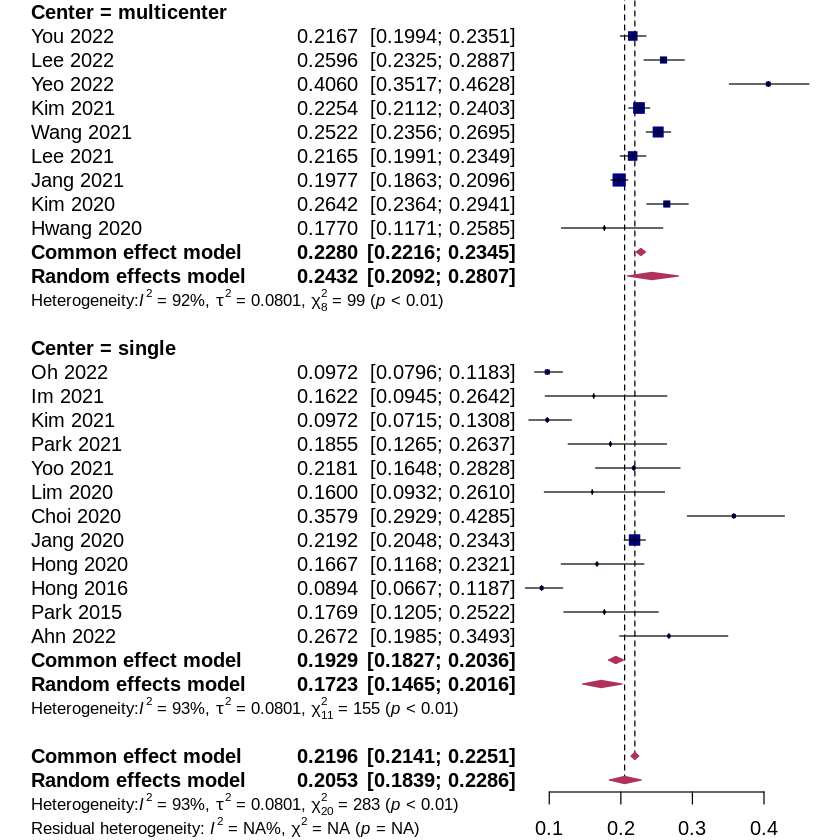

In [ ]:
forest(pes.summary,
       #sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       leftcols = c("studlab","effect", "ci"),#"event", "n","w.random" 
       leftlabs = c("Study","Proportion", "95% C.I."),#"Cases", "Total","Weights"
       xlab = "Proportion (‰)", 
       fs.xlab=12,
       fs.study=12,
       fs.study.lables=12,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)

박스가 클수록 가중치가 높은거

## Moderator analysis

subgroup 만드는 variable 을 여러개 define 해서 세부적으로 비교가능함, 더 여러 변수들 해볼 수 있음 


In [ ]:
subganal.studydesign2=rma(yi,vi,data=ies.logit,mods=~Center,method="REML")
print(subganal.studydesign2, digits = 4)


Mixed-Effects Model (k = 16; tau^2 estimator: REML)

tau^2 (estimated amount of residual heterogeneity):     0.0395 (SE = 0.0205)
tau (square root of estimated tau^2 value):             0.1988
I^2 (residual heterogeneity / unaccounted variability): 88.10%
H^2 (unaccounted variability / sampling variability):   8.40
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 14) = 75.5050, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.0653, p-val = 0.7983

Model Results:

              estimate      se      zval    pval    ci.lb    ci.ub      
intrcpt        -1.2182  0.0758  -16.0738  <.0001  -1.3668  -1.0697  *** 
Centersingle   -0.0313  0.1226   -0.2555  0.7983  -0.2716   0.2089      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



p-value 0.0019 < 0.05 -> single, multicenter 그룹이 서로 다르다. 

## Boxplot for Center

In [ ]:
subganal.Center=rma(yi,vi,data=ies.logit,mods=~Center,method="DL")
preds.Center=predict(subganal.Center,newmods=c(0:2),transf=transf.ilogit)
wi=1/sqrt(ies.logit$vi)
size=1+3*(wi-min(wi))/(max(wi)-min(wi))

In [ ]:
ies.logit$Center

[1] "multicenter" "multicenter" "multicenter" "single"      "single"     
 [6] "single"      "multicenter" "multicenter" "single"      "multicenter"
[11] "single"      "multicenter" "multicenter" "multicenter" "single"     
[16] "single"      "single"      "single"      "single"      "single"     
[21] "single"

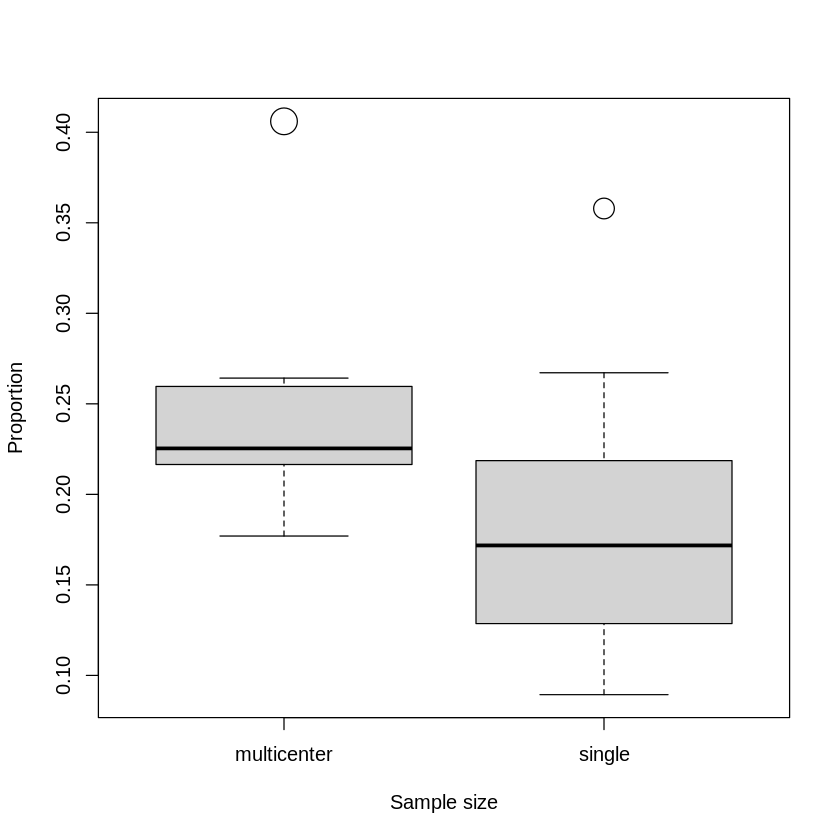

In [ ]:
plot(factor(ies.logit$Center),transf.ilogit(ies.logit$yi),cex=size,xlab="Sample size", ylab="Proportion")

In [ ]:
preds.Center


    pred  ci.lb  ci.ub  pi.lb  pi.ub 
1 0.2432 0.2092 0.2807 0.1515 0.3664 
2 0.1723 0.1465 0.2016 0.1037 0.2725 
3 0.1189 0.0805 0.1721 0.0626 0.2142 


여러 Moderator 별로 Forest plot 그려보는 것도 좋을듯

## Outlier 제거 후 해보면...

In [ ]:
subd = subd[-c(3,4, 19),]
ies.logit=escalc(xi=sepsis_d,ni=sepsis_tot,measure="PLO",data=subd)  ## PLO 가 logit transformation 하는 부분
pes.logit=rma(yi,vi,data=ies.logit,method="DL",weighted=TRUE)  ## rma 는 random effect model , DL 은 이질성의 정도(degree of heterogeneity)
pes=predict(pes.logit,transf=transf.ilogit)  ## logit 변환한거 proportion 으로 되돌림
print(pes,digits=6);print(pes.logit,digits=4);confint(pes.logit,digits=2)


     pred    ci.lb    ci.ub    pi.lb    pi.ub 
 0.227548 0.212104 0.243768 0.180462 0.282682 


Random-Effects Model (k = 16; tau^2 estimator: DL)

tau^2 (estimated amount of total heterogeneity): 0.0199 (SE = 0.0120)
tau (square root of estimated tau^2 value):      0.1412
I^2 (total heterogeneity / total variability):   80.14%
H^2 (total variability / sampling variability):  5.04

Test for Heterogeneity:
Q(df = 15) = 75.5257, p-val < .0001

Model Results:

estimate      se      zval    pval    ci.lb    ci.ub      
 -1.2222  0.0460  -26.5932  <.0001  -1.3123  -1.1321  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




       estimate ci.lb ci.ub 
tau^2      0.02  0.01  0.15 
tau        0.14  0.12  0.38 
I^2(%)    80.14 73.69 96.77 
H^2        5.04  3.80 30.98 


In [ ]:
#Pool within-group estimates of tau-squared (between-study variance):0.4427 is the combined tau^2 yielded by pooling 0.93224 and 0.24743
#Residual heterogeneity is heterogeneity not explained by the covariate (Thompson and Sharp, 1999). The results of the Test for Residual Heterogeneity show that there is significant unexplained variance left between all effect sizes in the dataset, which can explain why R^2 shows 0%
#The category that is coded as 0 (ie Birth cohort) will become the reference category (represented by the intercept).The other category coded as 1 (ie Others) will be compared against the reference category.
#The value of the intercept is the logit-transformed summary(mean) effect size of the studies in the reference category (ie Birth cohort)
#The summary effect size of the studies in the other category(ie Others) equals to -7.9742+0.3452=-7.629
#To create multivariate model:subganal.sizedesign=rma(yi,vi,data=ies.logit,mods=~samplesize+studydesign,method="DL")
subganal.studydesign=rma(yi,vi,data=ies.logit,mods=~Center,method="DL")
pes.logit.single=rma(yi,vi,data=ies.logit,mods=~Center=="single",method="DL")
pes.logit.multi=rma(yi,vi,data=ies.logit,mods=~Center=="multicenter",method="DL")
pes.subg.studydesign=predict(subganal.studydesign,transf=transf.ilogit)
dat.samevar=data.frame(estimate=c((pes.logit.single$b)[1],(pes.logit.multi$b)[1]),
                       stderror=c((pes.logit.single$se)[1],(pes.logit.multi$se)[1]),
                       tau2=subganal.studydesign$tau2)
pes.logit.studydesign=rma(estimate,sei=stderror,method="DL",data=dat.samevar) 
pes.studydesign=predict(pes.logit.studydesign,transf=transf.ilogit)
#print(pes.subg.studydesign[order(pes.subg.studydesign$pred)],digits=6)
print(subganal.studydesign,digits=4)
print(pes.subg.studydesign[1],digits=6);print(pes.subg.studydesign[17],digits=6)
print(pes.studydesign,digits=6)


Mixed-Effects Model (k = 18; tau^2 estimator: DL)

tau^2 (estimated amount of residual heterogeneity):     0.0343 (SE = 0.0202)
tau (square root of estimated tau^2 value):             0.1852
I^2 (residual heterogeneity / unaccounted variability): 85.21%
H^2 (unaccounted variability / sampling variability):   6.76
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 16) = 108.1960, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 2.1170, p-val = 0.1457

Model Results:

              estimate      se      zval    pval    ci.lb    ci.ub      
intrcpt        -1.2173  0.0711  -17.1137  <.0001  -1.3567  -1.0779  *** 
Centersingle   -0.1606  0.1104   -1.4550  0.1457  -0.3770   0.0557      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


      pred    ci.lb    ci.ub    pi.lb    pi.ub 
1 0.228408 0.204771 0.253903 0.167134 0.303949 


       pred    ci.lb    ci.ub    pi.lb    pi.ub 
17 0.201342 0.176046 0.2

제거 후에는 Center 모더레이터가 유의미하지 않음..

In [ ]:
subganal.studydesign=rma(yi,vi,data=ies.logit,mods=~Center,method="DL")
pes.summary=metaprop(sepsis_d, #cases,
                     sepsis_tot, #total,
                     authoryear,
                     data=subd,
                     #sortvar(precision)
                     byvar=Center,
                     sm="PLO",
                     method.ci="NAsm",
                     method.tau="DL",
                     incr=0.5,
                     allincr=FALSE,
                     addincr=FALSE,
                     tau.common=TRUE,
                     tau.preset=sqrt(subganal.studydesign$tau2),
                     title="")

In [ ]:

pes.summary

Number of studies combined: k = 18
Number of observations: o = 20737
Number of events: e = 4572

                     proportion           95%-CI
Common effect model      0.2222 [0.2165; 0.2279]
Random effects model     0.2169 [0.1993; 0.2355]

Quantifying heterogeneity:
 tau^2 = 0.0343; tau = 0.1852; I^2 = 84.6% [76.9%; 89.7%]; H = 2.55 [2.08; 3.11]

Test of heterogeneity:
      Q d.f.  p-value
 110.11   17 < 0.0001

Results for subgroups (common effect model):
                       k proportion           95%-CI     Q   I^2
Center = multicenter   8     0.2242 [0.2179; 0.2307] 47.31 85.2%
Center = single       10     0.2144 [0.2025; 0.2268] 60.89 85.2%

Test for subgroup differences (common effect model):
                    Q d.f.  p-value
Between groups   1.91    1   0.1666
Within groups  108.20   16 < 0.0001

Results for subgroups (random effects model):
                       k proportion           95%-CI  tau^2    tau
Center = multicenter   8     0.2284 [0.2048; 0.2539] 0.0343 0.

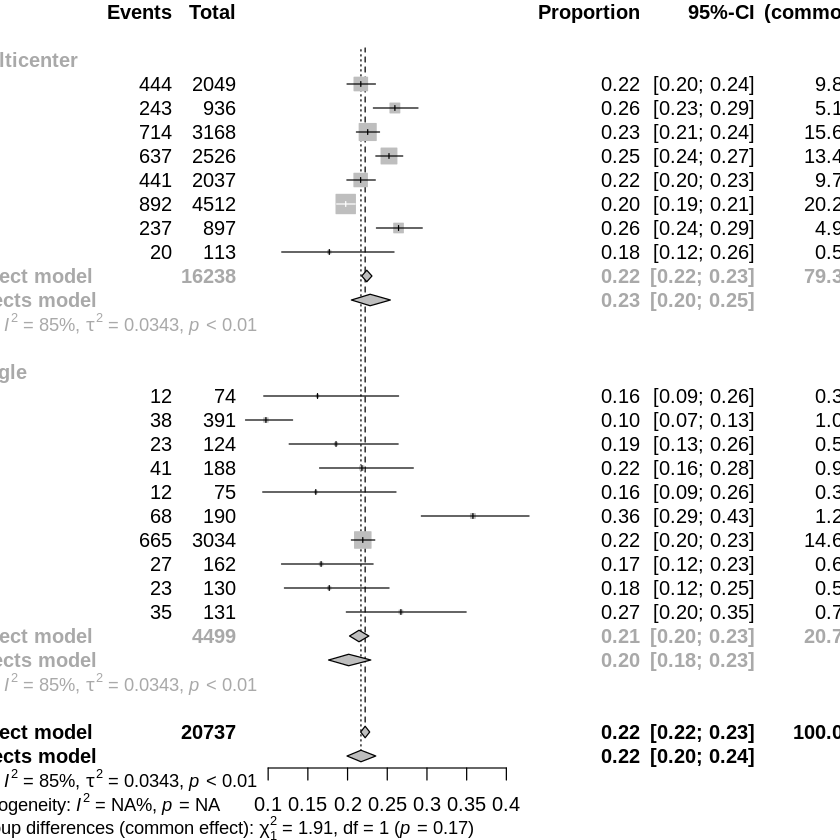

In [ ]:
forest(pes.summary)

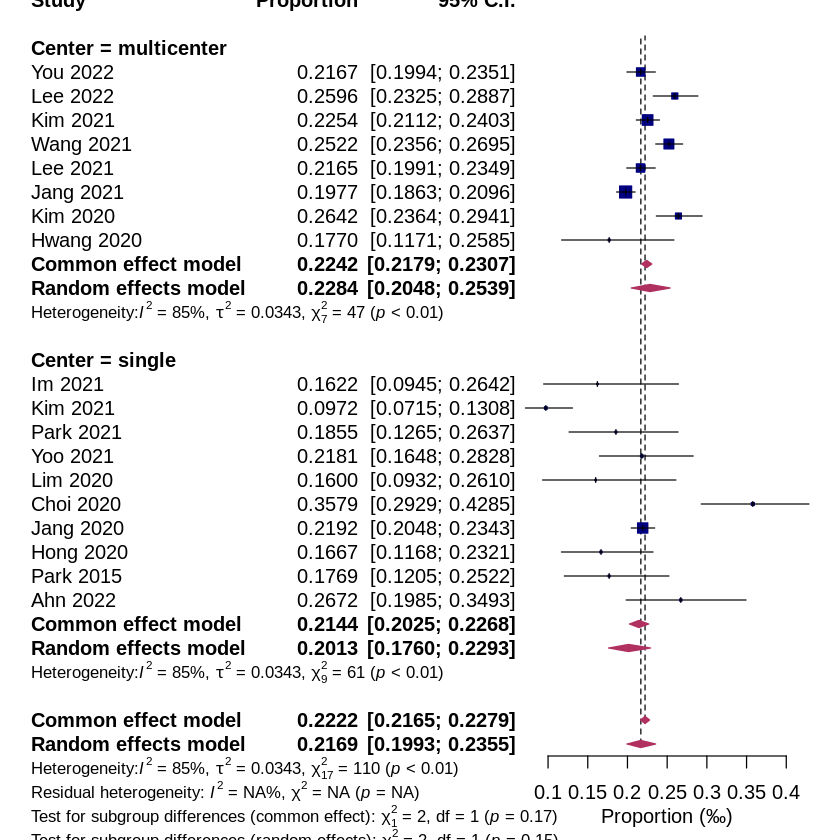

In [ ]:
forest(pes.summary,
       #sortvar=precision,
#       xlim = c(0,1), pscale =1000, #if proportions are too low, consider rescaling proportions
       rightcols=FALSE,
       leftcols = c("studlab","effect", "ci"),#"event", "n","w.random" 
       leftlabs = c("Study","Proportion", "95% C.I."),#"Cases", "Total","Weights"
       xlab = "Proportion (‰)", 
       fs.xlab=12,
       fs.study=12,
       fs.study.lables=12,
       fs.heading=12,
       squaresize = 0.5, col.square="navy", col.square.lines="navy",
       col.diamond="maroon", col.diamond.lines="maroon",
       comb.fixed=FALSE,
       lty.random=2, #lty.fixed=0,
       type.study="square",
       type.random="diamond",
       ff.random="bold", #ff.fixed="bold",
       hetlab = "Heterogeneity:",
       fs.hetstat=10,
       smlab="",
       print.Q=TRUE,
       print.pval.Q=TRUE,
       print.I2=TRUE,
       print.tau2=TRUE,
       col.by="black",
       digits=4,
       digits.Q=0)

박스가 클수록 가중치가 높은거

## Moderator analysis

subgroup 만드는 variable 을 여러개 define 해서 세부적으로 비교가능함, 더 여러 변수들 해볼 수 있음 


In [ ]:
subganal.studydesign2=rma(yi,vi,data=ies.logit,mods=~Center,method="REML")
print(subganal.studydesign2, digits = 4)


Mixed-Effects Model (k = 18; tau^2 estimator: REML)

tau^2 (estimated amount of residual heterogeneity):     0.0894 (SE = 0.0394)
tau (square root of estimated tau^2 value):             0.2990
I^2 (residual heterogeneity / unaccounted variability): 93.76%
H^2 (unaccounted variability / sampling variability):   16.02
R^2 (amount of heterogeneity accounted for):            0.17%

Test for Residual Heterogeneity:
QE(df = 16) = 108.1960, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 1.2199, p-val = 0.2694

Model Results:

              estimate      se      zval    pval    ci.lb    ci.ub      
intrcpt        -1.2244  0.1102  -11.1073  <.0001  -1.4404  -1.0083  *** 
Centersingle   -0.1754  0.1588   -1.1045  0.2694  -0.4867   0.1359      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



p-value 0.269 > 0.05 -> single, multicenter 그룹이 차이가 없음 

## Boxplot for Center

In [ ]:
subganal.Center=rma(yi,vi,data=ies.logit,mods=~Center,method="DL")
preds.Center=predict(subganal.Center,newmods=c(0:2),transf=transf.ilogit)
wi=1/sqrt(ies.logit$vi)
size=1+3*(wi-min(wi))/(max(wi)-min(wi))

In [ ]:
ies.logit$Center

[1] "multicenter" "multicenter" "single"      "single"      "multicenter"
 [6] "multicenter" "single"      "multicenter" "single"      "multicenter"
[11] "multicenter" "multicenter" "single"      "single"      "single"     
[16] "single"      "single"      "single"

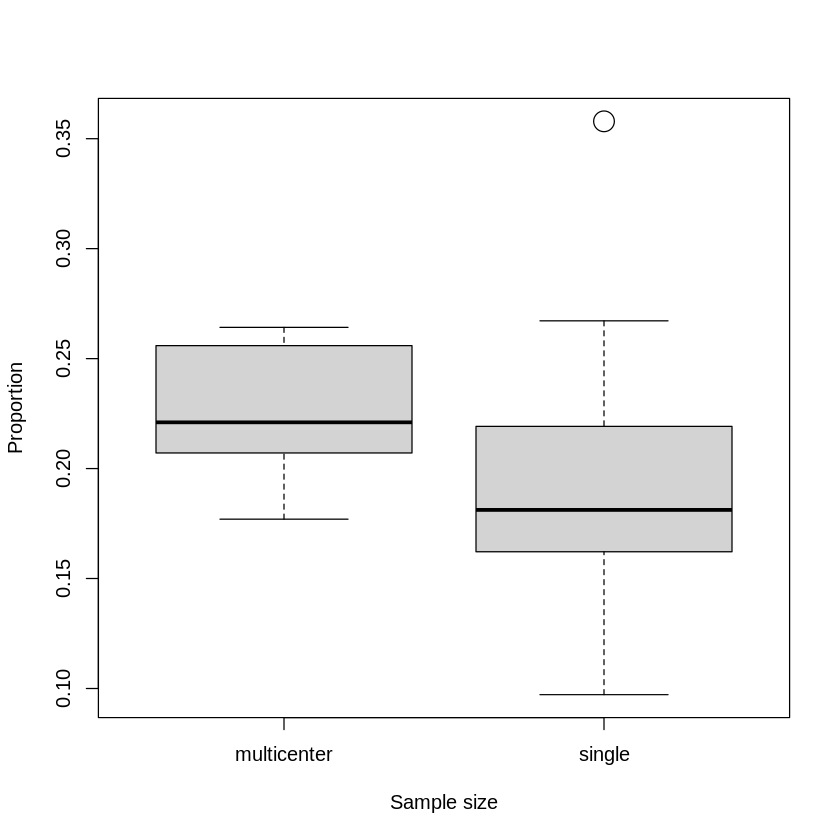

In [ ]:
plot(factor(ies.logit$Center),transf.ilogit(ies.logit$yi),cex=size,xlab="Sample size", ylab="Proportion")

In [ ]:
preds.Center


    pred  ci.lb  ci.ub  pi.lb  pi.ub 
1 0.2432 0.2092 0.2807 0.1515 0.3664 
2 0.1723 0.1465 0.2016 0.1037 0.2725 
3 0.1189 0.0805 0.1721 0.0626 0.2142 
